# Part 1 - Asking Questions, Data Cleaning & EDA

## Asking Questions

Before you actually perform the data preprocessing steps, we want to ask some data science or machine learning questions that our project intends to answer. Here, we define 2 simple questions that will be our main motivation of doing this project.

1. **Which features have the strongest correlation with price or rate of taxi ride?**
2. **How much is the rate of the taxi ride given the ride and weather information?**
3. **Which machine learning model performs best at predicting the rate of taxi ride?**

### Importing Libraries

Let's import some libraries for data preprocessing and visualisation.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime
import calendar
from datetime import date

## Data Cleaning
### Initial Steps of Data Cleaning - Exploration

We want to do a brief exploration on the dataset before we jump into data cleaning. This is to ensure that we get some understanding and expectations regarding the features and properties of the dataset which will help us in data cleaning later.

Also, we should set the maximum number of columns to be more than the number of columns in the dataset.

In [2]:
# Set the maximum number of columns to display
pd.set_option("display.max_columns", 70)

First, let's load the raw dataset into the environment first using pandas function read_csv. 

In [3]:
# Read the data into df
df = pd.read_csv("D:/Documents/Data Science Learning/My Project/Uber and Lyft Boston/02-data/rideshare_kaggle.csv")

# Take a look at the first 15 rows of the dataset
df.head(15)

id     timestamp  hour  day  month  \
0   424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1   4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2   981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3   c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4   e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
5   f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2  1.545071e+09    18   17     12   
6   462816a3-820d-408b-8549-0b39e82f65ac  1.543209e+09     5   26     11   
7   474d6376-bc59-4ec9-bf57-4e6d6faeb165  1.543780e+09    19    2     12   
8   4f9fee41-fde3-4767-bbf1-a00e108701fb  1.543818e+09     6    3     12   
9   8612d909-98b8-4454-a093-30bd48de0cb3  1.543316e+09    10   27     11   
10  9043bf77-1d45-4a93-9520-a083e0277f16  1.543594e+09    16   30     11   
11  d859ec69-b3ff-4af8-9abd-441e31430c94  1.543433e+09    19   28     11   
12  009e9c53-074d-43cf-aef2-0fbc7a47ed3d  1.543616e+09    22   30     11   
13  23f145da-f0c1-4d1f-a184-496bc003a7db  1.544698e+09    10   13     12   
14  357559cb-8c58-4278-a41a-e33b2e0997a3  1.544729e+09    19   13     12   

               datetime          timezone            source  \
0   2018-12-16 09:30:07  America/New_York  Haymarket Square   
1   2018-11-27 02:00:23  America/New_York  Haymarket Square   
2   2018-11-28 01:00:22  America/New_York  Haymarket Square   
3   2018-11-30 04:53:02  America/New_York  Haymarket Square   
4   2018-11-29 03:49:20  America/New_York  Haymarket Square   
5   2018-12-17 18:25:12  America/New_York  Haymarket Square   
6   2018-11-26 05:03:00  America/New_York          Back Bay   
7   2018-12-02 19:53:04  America/New_York          Back Bay   
8   2018-12-03 06:28:02  America/New_York          Back Bay   
9   2018-11-27 10:45:22  America/New_York          Back Bay   
10  2018-11-30 16:13:03  America/New_York          Back Bay   
11  2018-11-28 19:23:07  America/New_York          Back Bay   
12  2018-11-30 22:13:01  America/New_York         North End   
13  2018-12-13 10:50:11  America/New_York         North End   
14  2018-12-13 19:15:03  America/New_York         North End   

                destination cab_type                            product_id  \
0             North Station     Lyft                             lyft_line   
1             North Station     Lyft                          lyft_premier   
2             North Station     Lyft                                  lyft   
3             North Station     Lyft                           lyft_luxsuv   
4             North Station     Lyft                             lyft_plus   
5             North Station     Lyft                              lyft_lux   
6   Northeastern University     Lyft                             lyft_plus   
7   Northeastern University     Lyft                              lyft_lux   
8   Northeastern University     Lyft                             lyft_line   
9   Northeastern University     Lyft                           lyft_luxsuv   
10  Northeastern University     Lyft                          lyft_premier   
11  Northeastern University     Lyft                                  lyft   
12                 West End     Uber  6f72dfc5-27f1-42e8-84db-ccc7a75f6969   
13                 West End     Uber  6c84fd89-3f11-4782-9b50-97c468b19529   
14                 West End     Uber  55c66225-fbe7-4fd5-9072-eab1ece5e23e   

            name  price  distance  surge_multiplier  latitude  longitude  \
0         Shared    5.0      0.44               1.0   42.2148   -71.0330   
1            Lux   11.0      0.44               1.0   42.2148   -71.0330   
2           Lyft    7.0      0.44               1.0   42.2148   -71.0330   
3   Lux Black XL   26.0      0.44               1.0   42.2148   -71.0330   
4        Lyft XL    9.0      0.44               1.0   42.2148   -71.0330   
5      Lux Black   16.5      0.44               1.0   42.2148   -71.0330   
6        Lyft XL   10.5      1.

Now, we use the df.info() function to display some information about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Let's check if there's any missing values in those columns.

In [5]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [6]:
df.describe()

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  apparentTemperature  precipIntensity  \
count  693071.000000  693071.000000        693071.000000    693071.000000   
mean      -71.066151      39.584388            35.881222         0.008922   
std         0.020302       6.726084             7.918707         0.026901   
min       -71.105400      18.910000            12.130000         0.000000   
25%       -71.081000      36.450000            31.910000         0.000000   
50%       -71.063100      40.490000            35.900000         0.000000   
75%       -71.054200      43.580000            40.080000         0.000000   
max       -71.033000      57.220000            57.220000         0.144700   

       precipProbability       humidity      windSpeed       windGust  \
count      693071.000000  693071.000000  693071.000000  693071.000000   
mean            0.146076       0.741119       6.186253       8.469860   
std             0.328938       0.138595       3.148223       5.289179   
min             0.000000       0.380000       0.450000       0.800000   
25%             0.000000       0.640000       3.410000       4.060000   
50%             0.000000       0.710000       5.910000       7.550000   
75%             0.000000       0.880000       8.410000      11.740000   
max             1.000000       0.960000      15.000000      27.250000   

       windGustTime     visibility  temperatureHigh  temperatureHighTime  \
count  6.930710e+05  693071.000000    693071.000000         6.930710e+05   
mean   1.544049e+09       8.467970        45.040982         1.544050e+09   
std    6.928244e+05       2.602888         5.996541         6.937921e+05   
min    1.543151e+09       0.717000        32.680000         1.543154e+09   
25%    1.543432e+09       8.432000        42.570000         1.543439e+09   
50%    1.543756e+09       9.880000        44.680000         1.543788e+09   
75%    1.544846e+09       9.996000        46.910000         1.544814e+09   
max    1.545127e+09      10.000000        57.870000         1.545160e+09   

       temperatureLow  temperatureLowTime  apparentTemperatureHigh  \
count   693071.000000        6.930710e+05            693071.000000   
mean        34.150736        1.544102e+09                41.614054   
std          6.383163        6.922923e+05                 7.666138   
min         17.850000        1.543234e+09                22.620000   
25%         30.170000        1.543489e+09                36.570000   
50%         34.180000        1.543817e+09                40.950000   
75%         38.730000        1.544836e+09                44.120000   
max         46.600000        1.545221e+09                57.200000   

       apparentTemperatureHighTime  apparentTemperatureLow  \
count             

It's interesting to see a few columns that are categorical, let's take a look

In [7]:
df.product_id.value_counts()

6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_lux                                51235
lyft_plus                               51235
lyft_luxsuv                             51235
lyft_premier                            51235
lyft                                    51235
lyft_line                               51233
Name: product_id, dtype: int64

In [8]:
df.name.value_counts()

WAV             55096
Black SUV       55096
UberXL          55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux Black XL    51235
Lyft            51235
Lux             51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

In [9]:
df.destination.value_counts()

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

In [10]:
df.short_summary.value_counts()

 Overcast             218895
 Mostly Cloudy        146210
 Partly Cloudy        127224
 Clear                 87126
 Light Rain            54912
 Rain                  23712
 Possible Drizzle      18636
 Foggy                  9060
 Drizzle                7296
Name: short_summary, dtype: int64

Let's also take a look at the only column that has missing values, that is the price column

In [11]:
df[df['price'].isnull()]

id     timestamp  hour  day  month  \
18      fa5fb705-03a0-4eb9-82d9-7fe80872f754  1.543674e+09    14    1     12   
31      eee70d94-6706-4b95-a8ce-0e34f0fa8f37  1.543795e+09    23    2     12   
40      7f47ff53-7cf2-4a6a-8049-83c90e042593  1.543524e+09    20   29     11   
60      43abdbe4-ab9e-4f39-afdc-31cfa375dc25  1.544732e+09    20   13     12   
69      80db1c49-9d51-4575-a4f4-1ec23b4d3e31  1.543583e+09    13   30     11   
...                                      ...           ...   ...  ...    ...   
693025  70ad9983-92dd-4cdf-af16-732e7e9ee9d0  1.544887e+09    15   15     12   
693047  84e05ef0-781a-4bd5-a593-bbbf659d4ba0  1.543456e+09     1   29     11   
693049  885ef635-299e-45cf-8052-c45a39e9822a  1.543456e+09     1   29     11   
693060  50a7b6be-ed2a-4a11-8d36-73bd977ad66a  1.543728e+09     5    2     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   

                   datetime          timezone            source  \
18      2018-12-01 14:13:04  America/New_York         North End   
31      2018-12-02 23:52:56  America/New_York       Beacon Hill   
40      2018-11-29 20:38:05  America/New_York     North Station   
60      2018-12-13 20:10:16  America/New_York         North End   
69      2018-11-30 13:08:03  America/New_York         North End   
...                     ...               ...               ...   
693025  2018-12-15 15:15:13  America/New_York     South Station   
693047  2018-11-29 01:47:08  America/New_York  Haymarket Square   
693049  2018-11-29 01:47:08  America/New_York         North End   
693060  2018-12-02 05:28:04  America/New_York  Theatre District   
693068  2018-12-01 23:53:05  America/New_York          West End   

             destination cab_type                            product_id  name  \
18              West End     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   
31         South Station     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   
40                Fenway     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   
60              West End     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   
69           Beacon Hill     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   
...                  ...      ...                                   ...   ...   
693025       Beacon Hill     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   
693047       Beacon Hill     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   
693049       Beacon Hill     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   
693060  Haymarket Square     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   
693068         North End     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   

        price  distance  surge_multiplier  latitude  longitude  temperature  \
18        NaN      1.11               1.0   42.3647   -71.0542        36.99   
31        NaN      2.48               1.0   42.3588   -71.0707        48.83   
40        NaN      2.94               1.0   42.3661   -71.0631        42.50   
60        NaN      1.16               1.0   42.3647   -71.0542        33.15   
69        NaN      2.67               1.0   42.3647   -71.0542        31.80   
...       ...       ...               ...       ...        ...          ...   
693025    NaN      2.50               1.0   42.3519   -71.0551        50.71   
693047    NaN      0.91               1.0   42.3647   -71.0542        38.42   
693049    NaN      1.79               1.0   42.3647   -71.0542        38.42   
693060    NaN      1.61               1.0   42.3503   -71.0810        38.19   
693068    NaN      1.00               1.0   42.3519   -71.0643        37.05   

        apparentTemperature    short_summary  \
18                    32.27   Partly Cloudy    
31                    48.83        Overcast    
40                    36.47   Partly Cloudy    
60                    30.60   Mostly Cloudy    
69                    31.80           Clear    
...                     ...              ...   
693025            

In [12]:
df[(df['name'] == 'Taxi') & (df['price'].notnull())]

Empty DataFrame
Columns: [id, timestamp, hour, day, month, datetime, timezone, source, destination, cab_type, product_id, name, price, distance, surge_multiplier, latitude, longitude, temperature, apparentTemperature, short_summary, long_summary, precipIntensity, precipProbability, humidity, windSpeed, windGust, windGustTime, visibility, temperatureHigh, temperatureHighTime, temperatureLow, temperatureLowTime, apparentTemperatureHigh, apparentTemperatureHighTime, apparentTemperatureLow, apparentTemperatureLowTime, icon, dewPoint, pressure, windBearing, cloudCover, uvIndex, visibility.1, ozone, sunriseTime, sunsetTime, moonPhase, precipIntensityMax, uvIndexTime, temperatureMin, temperatureMinTime, temperatureMax, temperatureMaxTime, apparentTemperatureMin, apparentTemperatureMinTime, apparentTemperatureMax, apparentTemperatureMaxTime]
Index: []

We identified the missing rows and the properties associated with those rows. We should have an idea on how to deal with this later.

Now we can proceed to the actual data cleaning steps!

### Data Preprocessing Steps

There are a few steps that are important in the data cleaning process that are outlined below:

- Removing duplicates
- Dealing with missing values
- Removing irrelevant columns
- Feature Engineering 

### 1. Removing Duplicates

Duplicates are data replicates that may interfere with our analysis and predictions. It is important to remove these rows.

In [13]:
# Use df.duplicated() function to get the boolean index
df[df.duplicated() == True]

Empty DataFrame
Columns: [id, timestamp, hour, day, month, datetime, timezone, source, destination, cab_type, product_id, name, price, distance, surge_multiplier, latitude, longitude, temperature, apparentTemperature, short_summary, long_summary, precipIntensity, precipProbability, humidity, windSpeed, windGust, windGustTime, visibility, temperatureHigh, temperatureHighTime, temperatureLow, temperatureLowTime, apparentTemperatureHigh, apparentTemperatureHighTime, apparentTemperatureLow, apparentTemperatureLowTime, icon, dewPoint, pressure, windBearing, cloudCover, uvIndex, visibility.1, ozone, sunriseTime, sunsetTime, moonPhase, precipIntensityMax, uvIndexTime, temperatureMin, temperatureMinTime, temperatureMax, temperatureMaxTime, apparentTemperatureMin, apparentTemperatureMinTime, apparentTemperatureMax, apparentTemperatureMaxTime]
Index: []

Great, this is good news that we have no duplicates.

### 2. Dealing with Missing Values

Since this is considered as a mini project, we only have one column that has missing values to deal with, that is the price column. Let's take a look at it again.

In [14]:
df['price'].isnull().sum()

55095

We want to know the percentage of missing rows compared to total number of rows.

In [15]:
df['price'].isnull().sum()/df.shape[0] * 100

7.949402009317949

During exploration, we know that these missing rows are all Uber related rows and they are all under the "Taxi" product name. Unfortunately, we have no other useful information to do hot deck imputation. Besides, it is a bad idea to use mean or mode to impute these missing price entries because different product of rides may have different price distribution.

Thus, the best way to deal with this for our problem is to remove these rows.

In [16]:
df2 = df.drop(df[df['price'].isnull()].index)

Compare the number of rows before dropping and after dropping the rows.

In [17]:
df.shape, df2.shape

((693071, 57), (637976, 57))

In [18]:
df2.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

We confirmed that there are no missing entries in our new dataframe now. This is a rather easy approach.

### 3. Removing Irrelevant Columns

The next step is to remove irrelevant columns from the raw dataset. We see that there are a total of 57 columns which is too many to be used for EDA and ML later, thus it's best to remove as many as possible that are possibly insignificant. For this step, we divide it into Ride Columns and Weather Columns to be processed.

#### Ride Columns

We already have hour, month and day extracted in the raw dataset which means that we don't need timestamp, datetime and timezone columns. Besides, we also don't need product_id as we already have name which represents the name of the product. As for surge multiplier, we'll keep it for now just in case because I feel that it can be a good indicator of price spikes. id, latitude and longitude column is also not relevant as expected.

In [19]:
ride_cols = ["id", "timestamp", "timezone", "product_id", "latitude", "longitude"]

#### Weather Columns

It is rather tricky for weather columns because some columns overlap and we have to choose which ones to keep and drop. To do some inspections, we look at the 2 similar columns side by side, which are short summary and icon.

In [20]:
df2.groupby(['short_summary'])['icon'].apply(lambda x: np.unique(x))

short_summary
 Clear                                [ clear-day ,  clear-night ]
 Drizzle                                                  [ rain ]
 Foggy                                                     [ fog ]
 Light Rain                                               [ rain ]
 Mostly Cloudy        [ partly-cloudy-day ,  partly-cloudy-night ]
 Overcast                                               [ cloudy ]
 Partly Cloudy        [ partly-cloudy-day ,  partly-cloudy-night ]
 Possible Drizzle                                         [ rain ]
 Rain                                                     [ rain ]
Name: icon, dtype: object

In my opinion, icon can be dropped so we only use short summary. Let's keep it that way for now.

For rain, we'll take precipIntensityMax and eliminate the other 2 which are precipIntensity and precipProbability. For humidity, we'll take humidity and eliminate dewPoint. As for temperature, we'll take temperature only and eliminate 8 related temperature columns and also another 8 of those duplicate columns. For wind, we'll use windSpeed and windGust and eliminate windGustTime and windBearing. For visibility, we take visibility and eliminate visibility.1. Ozone and UV related columns are not significant so we remove them as well.

In [21]:
weather_cols = ["precipIntensity", "precipProbability", "windGustTime", "temperatureHigh", "temperatureHighTime", "temperatureLow", 
                "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", 
                "apparentTemperatureLowTime", "icon", "dewPoint", "windBearing", "uvIndex", "visibility.1", "ozone", "sunriseTime", 
                "sunsetTime", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", 
                "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime", 
                "apparentTemperature"]

We can proceed to drop those defined columns now.

In [22]:
# Drop the ride columns using axis=1
df3 = df2.drop(ride_cols, axis=1)

# Drop the weather columns using axis=1
df3 = df3.drop(weather_cols, axis=1)

Now let's look at the resulting dimension of the dataset.

In [23]:
df3.shape

(637976, 22)

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                637976 non-null  int64  
 1   day                 637976 non-null  int64  
 2   month               637976 non-null  int64  
 3   datetime            637976 non-null  object 
 4   source              637976 non-null  object 
 5   destination         637976 non-null  object 
 6   cab_type            637976 non-null  object 
 7   name                637976 non-null  object 
 8   price               637976 non-null  float64
 9   distance            637976 non-null  float64
 10  surge_multiplier    637976 non-null  float64
 11  temperature         637976 non-null  float64
 12  short_summary       637976 non-null  object 
 13  long_summary        637976 non-null  object 
 14  humidity            637976 non-null  float64
 15  windSpeed           637976 non-nul

### 4. Feature Engineering

Feature engineering is an essential step for our analysis and prediction problem because our goal is to predict the rate of pricing of the rides instead of the price itself. Thus, we need to obtain the price rate per mile distance.

In [25]:
df3.price / df3.distance

0         11.363636
1         25.000000
2         15.909091
3         59.090909
4         20.454545
            ...    
693065     9.500000
693066    13.000000
693067     9.500000
693069    27.000000
693070    10.000000
Length: 637976, dtype: float64

In [26]:
# Copy a df to df4
df4 = df3.copy()

# Name the new column as "price_per_mile"
df4["price_per_mile"] = df4["price"] / df4["distance"]

Let's take a look at the newly added column in the dataframe.

In [27]:
df4.head()

hour  day  month             datetime            source    destination  \
0     9   16     12  2018-12-16 09:30:07  Haymarket Square  North Station   
1     2   27     11  2018-11-27 02:00:23  Haymarket Square  North Station   
2     1   28     11  2018-11-28 01:00:22  Haymarket Square  North Station   
3     4   30     11  2018-11-30 04:53:02  Haymarket Square  North Station   
4     3   29     11  2018-11-29 03:49:20  Haymarket Square  North Station   

  cab_type          name  price  distance  surge_multiplier  temperature  \
0     Lyft        Shared    5.0      0.44               1.0        42.34   
1     Lyft           Lux   11.0      0.44               1.0        43.58   
2     Lyft          Lyft    7.0      0.44               1.0        38.33   
3     Lyft  Lux Black XL   26.0      0.44               1.0        34.38   
4     Lyft       Lyft XL    9.0      0.44               1.0        37.44   

     short_summary                                       long_summary  \
0   Mostly Cloudy                           Rain throughout the day.    
1            Rain    Rain until morning, starting again in the eve...   
2           Clear                         Light rain in the morning.    
3           Clear                  Partly cloudy throughout the day.    
4   Partly Cloudy                  Mostly cloudy throughout the day.    

   humidity  windSpeed  windGust  visibility  pressure  cloudCover  moonPhase  \
0      0.68       8.66      9.17      10.000   1021.98        0.72       0.30   
1      0.94      11.98     11.98       4.786   1003.97        1.00       0.64   
2      0.75       7.33      7.33      10.000    992.28        0.03       0.68   
3      0.73       5.28      5.28      10.000   1013.73        0.00       0.75   
4      0.70       9.14      9.14      10.000    998.36        0.44       0.72   

   precipIntensityMax  price_per_mile  
0              0.1276       11.363636  
1              0.1300       25.000000  
2              0.1064       15.909091  
3              0.0000       59.090909  
4              0.0001       20.454545

Next, we'll create a new feature from datetime column to produce a "day_of_week" column in English string format.

In [28]:
df4['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

0        2018-12-16 09:30:07
1        2018-11-27 02:00:23
2        2018-11-28 01:00:22
3        2018-11-30 04:53:02
4        2018-11-29 03:49:20
                 ...        
693065   2018-12-01 23:53:05
693066   2018-12-01 23:53:05
693067   2018-12-01 23:53:05
693069   2018-12-01 23:53:05
693070   2018-12-01 23:53:05
Name: datetime, Length: 637976, dtype: datetime64[ns]

In [29]:
# Transform the datetime column
df4['datetime'] = df4['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [30]:
# Check the data type
df4[['datetime']].dtypes

datetime    datetime64[ns]
dtype: object

In [31]:
df4['datetime'].apply(lambda x: calendar.day_name[x.weekday()])

0            Sunday
1           Tuesday
2         Wednesday
3            Friday
4          Thursday
            ...    
693065     Saturday
693066     Saturday
693067     Saturday
693069     Saturday
693070     Saturday
Name: datetime, Length: 637976, dtype: object

In [32]:
# Create the "day_of_week" column
df4['day_of_week'] = df4['datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [33]:
df4.shape

(637976, 24)

In [34]:
df4.isnull().sum().value_counts()

0    24
dtype: int64

Lastly, we'll create a path variable that combines source and destination.

In [159]:
df4["path"] = df4["source"] + "-" + df4["destination"]
df4["path"]

0         Haymarket Square-North Station
1         Haymarket Square-North Station
2         Haymarket Square-North Station
3         Haymarket Square-North Station
4         Haymarket Square-North Station
                       ...              
693065                West End-North End
693066                West End-North End
693067                West End-North End
693069                West End-North End
693070                West End-North End
Name: path, Length: 637976, dtype: object

In [160]:
df4.shape

(637976, 25)

### 5. Removing Outliers

Checking for outliers is another important step in data cleaning as we want to ensure that outliers are not there to disrupt the distribution of the data. We use the z score 

In [35]:
df5 = df4.copy()

df5['z_score'] = (df5.price_per_mile - df5.price_per_mile.mean()) / df5.price_per_mile.std()

In [36]:
df5.head()

hour  day  month            datetime            source    destination  \
0     9   16     12 2018-12-16 09:30:07  Haymarket Square  North Station   
1     2   27     11 2018-11-27 02:00:23  Haymarket Square  North Station   
2     1   28     11 2018-11-28 01:00:22  Haymarket Square  North Station   
3     4   30     11 2018-11-30 04:53:02  Haymarket Square  North Station   
4     3   29     11 2018-11-29 03:49:20  Haymarket Square  North Station   

  cab_type          name  price  distance  surge_multiplier  temperature  \
0     Lyft        Shared    5.0      0.44               1.0        42.34   
1     Lyft           Lux   11.0      0.44               1.0        43.58   
2     Lyft          Lyft    7.0      0.44               1.0        38.33   
3     Lyft  Lux Black XL   26.0      0.44               1.0        34.38   
4     Lyft       Lyft XL    9.0      0.44               1.0        37.44   

     short_summary                                       long_summary  \
0   Mostly Cloudy                           Rain throughout the day.    
1            Rain    Rain until morning, starting again in the eve...   
2           Clear                         Light rain in the morning.    
3           Clear                  Partly cloudy throughout the day.    
4   Partly Cloudy                  Mostly cloudy throughout the day.    

   humidity  windSpeed  windGust  visibility  pressure  cloudCover  moonPhase  \
0      0.68       8.66      9.17      10.000   1021.98        0.72       0.30   
1      0.94      11.98     11.98       4.786   1003.97        1.00       0.64   
2      0.75       7.33      7.33      10.000    992.28        0.03       0.68   
3      0.73       5.28      5.28      10.000   1013.73        0.00       0.75   
4      0.70       9.14      9.14      10.000    998.36        0.44       0.72   

   precipIntensityMax  price_per_mile day_of_week   z_score  
0              0.1276       11.363636      Sunday  0.122283  
1              0.1300       25.000000     Tuesday  1.117232  
2              0.1064       15.909091   Wednesday  0.453933  
3              0.0000       59.090909      Friday  3.604605  
4              0.0001       20.454545    Thursday  0.785583

In [37]:
df5[df5['z_score'] > 3]

hour  day  month            datetime              source  \
3          4   30     11 2018-11-30 04:53:02    Haymarket Square   
633        5   30     11 2018-11-30 05:32:56  Financial District   
671       11   17     12 2018-12-17 11:05:05  Financial District   
855       20   15     12 2018-12-15 20:30:09       South Station   
1007       9   28     11 2018-11-28 09:50:07    Haymarket Square   
...      ...  ...    ...                 ...                 ...   
691668    19   29     11 2018-11-29 19:38:04  Financial District   
691973     4    4     12 2018-12-04 04:42:56  Financial District   
692448    23   30     11 2018-11-30 23:48:04  Financial District   
692877     8    2     12 2018-12-02 08:12:56    Haymarket Square   
692929     6   29     11 2018-11-29 06:42:58    Haymarket Square   

               destination cab_type          name  price  distance  \
3            North Station     Lyft  Lux Black XL   26.0      0.44   
633          South Station     Uber     Black SUV   26.0      0.39   
671          South Station     Uber     Black SUV   26.0      0.39   
855     Financial District     Uber     Black SUV   27.5      0.54   
1007         North Station     Uber     Black SUV   27.5      0.49   
...                    ...      ...           ...    ...       ...   
691668       South Station     Uber     Black SUV   27.0      0.47   
691973       South Station     Lyft  Lux Black XL   26.0      0.44   
692448       South Station     Uber     Black SUV   27.5      0.39   
692877       North Station     Uber     Black SUV   27.0      0.49   
692929       North Station     Uber     Black SUV   27.5      0.49   

        surge_multiplier  temperature       short_summary  \
3                    1.0        34.38              Clear    
633                  1.0        33.78              Clear    
671                  1.0        34.87           Overcast    
855                  1.0        51.15              Clear    
1007                 1.0        34.26      Partly Cloudy    
...                  ...          ...                 ...   
691668               1.0        43.49      Mostly Cloudy    
691973               1.0        42.08      Mostly Cloudy    
692448               1.0        38.62           Overcast    
692877               1.0        38.95   Possible Drizzle    
692929               1.0        38.74      Mostly Cloudy    

                               long_summary  humidity  windSpeed  windGust  \
3        Partly cloudy throughout the day.       0.73       5.28      5.28   
633      Mostly cloudy throughout the day.       0.75       4.74      5.00   
671             Light rain in the morning.       0.93       7.37      8.18   
855      Mostly cloudy throughout the day.       0.62       4.78      4.78   
1007     Mostly cloudy throughout the day.       0.79       4.54      7.00   
...                                     ...       ...        ...       ...   
691668   Partly cloudy throughout the day.       0.52      12.13     19.97   
691973               Foggy in the morning.       0.65       7.07      9.16   
692448        Overcast throughout the day.       0.66       3.75      3.75   
692877           Light rain until evening.       0.88       3.18      4.16   
692929   Partly cloudy throughout the day.       0.69       9.42     13.28   

        visibility  pressure  cloudCover  moonPhase  precipIntensityMax  \
3           10.000   1013.73        0.00       0.75              0.0000   
633          9.990   1013.87        0.00       0.79              0.0003   
671          8.275   1004.23        1.00       0.33              0.0183   
855          9.501   1021.03        0.09       0.27              0.0075   
1007         9.924    991.12        0.25       0.72              0.0000   
...            ...       ...         ...        ...                 ...   
691668       9.796   1007.12        0.53       0.75              0.0000   
691973       9.821   1003.93        0.67       0.89              0.0004   
69244

In [38]:
df5[df5['z_score'] > 5]

hour  day  month            datetime              source  \
1333       8    3     12 2018-12-03 08:38:04  Financial District   
1952       0   29     11 2018-11-29 00:47:08           North End   
11272     16   28     11 2018-11-28 16:36:23       South Station   
11274     23    1     12 2018-12-01 23:38:05       South Station   
11275     23    3     12 2018-12-03 23:27:57       South Station   
...      ...  ...    ...                 ...                 ...   
683396     5   18     12 2018-12-18 05:00:03   Boston University   
683397     5   18     12 2018-12-18 05:00:03   Boston University   
684428     0   16     12 2018-12-16 00:35:11   Boston University   
685189     5    1     12 2018-12-01 05:43:03  Financial District   
686526     6   13     12 2018-12-13 06:50:10    Theatre District   

             destination cab_type          name  price  distance  \
1333       South Station     Lyft  Lux Black XL   45.5      0.46   
1952       North Station     Uber     Black SUV   27.5      0.30   
11272   Theatre District     Uber           WAV    7.5      0.02   
11274   Theatre District     Uber         Black   15.0      0.02   
11275   Theatre District     Uber         UberX    7.5      0.02   
...                  ...      ...           ...    ...       ...   
683396          Back Bay     Uber      UberPool    4.5      0.03   
683397          Back Bay     Uber         Black   15.0      0.03   
684428          Back Bay     Uber     Black SUV   27.5      0.03   
685189     South Station     Lyft  Lux Black XL   38.5      0.39   
686526     South Station     Uber     Black SUV   48.5      0.55   

        surge_multiplier  temperature    short_summary  \
1333                1.75        45.69           Foggy    
1952                1.00        39.41   Mostly Cloudy    
11272               1.00        41.16   Mostly Cloudy    
11274               1.00        37.05   Partly Cloudy    
11275               1.00        47.25           Clear    
...                  ...          ...              ...   
683396              1.00        36.27        Overcast    
683397              1.00        36.27        Overcast    
684428              1.00        43.96   Partly Cloudy    
685189              1.50        34.62   Mostly Cloudy    
686526              1.00        19.28           Clear    

                                      long_summary  humidity  windSpeed  \
1333                        Foggy in the morning.       0.95       1.05   
1952            Mostly cloudy throughout the day.       0.69       8.11   
11272           Mostly cloudy throughout the day.       0.61       8.33   
11274    Light rain in the morning and overnight.       0.74       2.34   
11275                       Foggy in the morning.       0.57       5.68   
...                                            ...       ...        ...   
683396          Mostly cloudy throughout the day.       0.66       9.02   
683397          Mostly cloudy throughout the day.       0.66       9.02   
684428          Mostly cloudy throughout the day.       0.68       5.48   
685189   Light rain in the morning and overnight.       0.77       2.59   
686526          Partly cloudy throughout the day.       0.57       3.60   

        windGust  visibility  pressure  cloudCover  moonPhase  \
1333        1.05       0.717   1000.79        1.00       0.89   
1952       12.21       9.996    996.21        0.81       0.72   
11272      12.76      10.000    991.41        0.81       0.72   
11274       2.87       9.785   1023.57        0.31       0.82   
11275       8.16      10.000   1001.76        0.04       0.89   
...          ...         ...       ...         ...        ...   
683396     15.15       7.357   1000.40        1.00       0.37   
683397     15.15       7.357   1000.40        1.00       0.37   
684428      8.73      10.000   1023.51        0.23       0.27   
685189      2.59       9.937   1018.67        0.83       0.82   
686526      3.60       9.868   1028.56        0.04       0.21

In [39]:
df5[df5['z_score'] < -2]

Empty DataFrame
Columns: [hour, day, month, datetime, source, destination, cab_type, name, price, distance, surge_multiplier, temperature, short_summary, long_summary, humidity, windSpeed, windGust, visibility, pressure, cloudCover, moonPhase, precipIntensityMax, price_per_mile, day_of_week, z_score]
Index: []

After some consideration, we decided to remove rows that have z score for price_per_mile larger than 5. This is because not all outliers with z score larger than 3 are meaningless outliers (most of those with z score < 5 are significant) so we decided to retain part of it for our analysis.

In [40]:
# Only take rows that have z score smaller or equal to 5
df6 = df5[df5["z_score"] <= 5]

# Drop the z score column
df6 = df6.drop(["z_score"], axis=1)

In [41]:
df6.head()

hour  day  month            datetime            source    destination  \
0     9   16     12 2018-12-16 09:30:07  Haymarket Square  North Station   
1     2   27     11 2018-11-27 02:00:23  Haymarket Square  North Station   
2     1   28     11 2018-11-28 01:00:22  Haymarket Square  North Station   
3     4   30     11 2018-11-30 04:53:02  Haymarket Square  North Station   
4     3   29     11 2018-11-29 03:49:20  Haymarket Square  North Station   

  cab_type          name  price  distance  surge_multiplier  temperature  \
0     Lyft        Shared    5.0      0.44               1.0        42.34   
1     Lyft           Lux   11.0      0.44               1.0        43.58   
2     Lyft          Lyft    7.0      0.44               1.0        38.33   
3     Lyft  Lux Black XL   26.0      0.44               1.0        34.38   
4     Lyft       Lyft XL    9.0      0.44               1.0        37.44   

     short_summary                                       long_summary  \
0   Mostly Cloudy                           Rain throughout the day.    
1            Rain    Rain until morning, starting again in the eve...   
2           Clear                         Light rain in the morning.    
3           Clear                  Partly cloudy throughout the day.    
4   Partly Cloudy                  Mostly cloudy throughout the day.    

   humidity  windSpeed  windGust  visibility  pressure  cloudCover  moonPhase  \
0      0.68       8.66      9.17      10.000   1021.98        0.72       0.30   
1      0.94      11.98     11.98       4.786   1003.97        1.00       0.64   
2      0.75       7.33      7.33      10.000    992.28        0.03       0.68   
3      0.73       5.28      5.28      10.000   1013.73        0.00       0.75   
4      0.70       9.14      9.14      10.000    998.36        0.44       0.72   

   precipIntensityMax  price_per_mile day_of_week  
0              0.1276       11.363636      Sunday  
1              0.1300       25.000000     Tuesday  
2              0.1064       15.909091   Wednesday  
3              0.0000       59.090909      Friday  
4              0.0001       20.454545    Thursday

In [42]:
df6.shape

(637515, 24)

One last thing to do is to drop the datetime column since we have used it to create our desired column and we have no use of it now.

In [43]:
# Drop the z score column
df6 = df6.drop(["datetime"], axis=1)

In [44]:
df6.shape

(637515, 23)

Our data cleaning steps are done here as there are generally fewer issues to deal with compared to other datasets. We can now proceed with Exploratory Data Analysis which is one of the core focuses of this mini project.

## Exploratory Data Analysis (EDA)

In EDA, few steps are important to be executed which are:

- Summary Statistics
- Boxplot
- Histogram
- Scatterplot
- Bar chart
- Correlation matrix

### Summary Statistics

Before going into visualisations, we can use describe() function to display the descriptive summaries which includes the five number summary. This can give us some ideas about the numerical properties of the columns.

#### Numeric Summaries

In [45]:
df6.describe()

hour           day          month          price  \
count  637515.000000  637515.00000  637515.000000  637515.000000   
mean       11.618067      17.79787      11.586562      16.544245   
std         6.948680       9.98177       0.492450       9.320072   
min         0.000000       1.00000      11.000000       2.500000   
25%         6.000000      13.00000      11.000000       9.000000   
50%        12.000000      17.00000      12.000000      13.500000   
75%        18.000000      28.00000      12.000000      22.500000   
max        23.000000      30.00000      12.000000      97.500000   

            distance  surge_multiplier    temperature       humidity  \
count  637515.000000     637515.000000  637515.000000  637515.000000   
mean        2.190761          1.015025      39.582026       0.741053   
std         1.134442          0.095218       6.725161       0.138570   
min         0.120000          1.000000      18.910000       0.380000   
25%         1.280000          1.000000      36.450000       0.640000   
50%         2.160000          1.000000      40.490000       0.710000   
75%         2.930000          1.000000      43.580000       0.880000   
max         7.860000          3.000000      57.220000       0.960000   

           windSpeed       windGust     visibility       pressure  \
count  637515.000000  637515.000000  637515.000000  637515.000000   
mean        6.186924       8.470861       8.469460    1010.093211   
std         3.147933       5.288851       2.601614      13.475788   
min         0.450000       0.800000       0.717000     988.090000   
25%         3.410000       4.060000       8.432000     999.820000   
50%         5.910000       7.550000       9.880000    1009.250000   
75%         8.410000      11.740000       9.996000    1021.860000   
max        15.000000      27.250000      10.000000    1035.550000   

          cloudCover      moonPhase  precipIntensityMax  price_per_mile  
count  637515.000000  637515.000000       637515.000000   637515.000000  
mean        0.686272       0.579061            0.037367        9.455712  
std         0.358602       0.244674            0.055216        7.666034  
min         0.000000       0.090000            0.000000        0.556586  
25%         0.370000       0.300000            0.000000        4.659091  
50%         0.820000       0.680000            0.000400        7.482993  
75%         1.000000       0.790000            0.091600       11.538462  
max         1.000000       0.930000            0.145900       78.205128

Let's look at Uber and Lyft separately for some columns.

In [46]:
# For Uber only
df6[df6['cab_type'] == 'Uber'].describe()

hour            day          month          price  \
count  330150.000000  330150.000000  330150.000000  330150.000000   
mean       11.607651      17.820548      11.586058      15.796742   
std         6.942219       9.972608       0.492539       8.557536   
min         0.000000       1.000000      11.000000       4.500000   
25%         6.000000      13.000000      11.000000       9.000000   
50%        12.000000      17.000000      12.000000      12.500000   
75%        17.000000      28.000000      12.000000      21.500000   
max        23.000000      30.000000      12.000000      89.500000   

            distance  surge_multiplier    temperature       humidity  \
count  330150.000000          330150.0  330150.000000  330150.000000   
mean        2.194071               1.0      39.568698       0.741351   
std         1.177296               0.0       6.720227       0.138653   
min         0.120000               1.0      18.910000       0.380000   
25%         1.300000               1.0      36.450000       0.640000   
50%         2.170000               1.0      40.490000       0.710000   
75%         2.840000               1.0      43.580000       0.880000   
max         7.860000               1.0      57.220000       0.960000   

          windSpeed       windGust     visibility       pressure  \
count  330150.00000  330150.000000  330150.000000  330150.000000   
mean        6.19748       8.485704       8.465295    1010.085165   
std         3.15066       5.295221       2.603276      13.458334   
min         0.45000       0.800000       0.717000     988.090000   
25%         3.41000       4.060000       8.432000     999.840000   
50%         5.91000       7.550000       9.880000    1009.250000   
75%         8.41000      11.740000       9.996000    1021.860000   
max        15.00000      27.250000      10.000000    1035.550000   

          cloudCover      moonPhase  precipIntensityMax  price_per_mile  
count  330150.000000  330150.000000       330150.000000   330150.000000  
mean        0.686487       0.578672            0.037348        9.254186  
std         0.358582       0.244617            0.055203        7.797983  
min         0.000000       0.090000            0.000000        1.474531  
25%         0.370000       0.300000            0.000000        4.458599  
50%         0.820000       0.680000            0.000400        7.070707  
75%         1.000000       0.790000            0.091600       11.217949  
max         1.000000       0.930000            0.145900       78.205128

In [47]:
# For Lyft only
df6[df6['cab_type'] == 'Lyft'].describe()

hour            day          month          price  \
count  307365.000000  307365.000000  307365.000000  307365.000000   
mean       11.629255      17.773510      11.587103      17.347160   
std         6.955607       9.991561       0.492355      10.013095   
min         0.000000       1.000000      11.000000       2.500000   
25%         6.000000      13.000000      11.000000       9.000000   
50%        12.000000      17.000000      12.000000      16.500000   
75%        18.000000      28.000000      12.000000      22.500000   
max        23.000000      30.000000      12.000000      97.500000   

            distance  surge_multiplier    temperature       humidity  \
count  307365.000000     307365.000000  307365.000000  307365.000000   
mean        2.187206          1.031163      39.596341       0.740733   
std         1.086522          0.135285       6.730439       0.138479   
min         0.390000          1.000000      18.910000       0.380000   
25%         1.270000          1.000000      36.450000       0.640000   
50%         2.140000          1.000000      40.490000       0.710000   
75%         2.970000          1.000000      43.580000       0.880000   
max         6.330000          3.000000      57.220000       0.960000   

           windSpeed       windGust     visibility       pressure  \
count  307365.000000  307365.000000  307365.000000  307365.000000   
mean        6.175586       8.454918       8.473934    1010.101853   
std         3.144966       5.281962       2.599823      13.494527   
min         0.450000       0.800000       0.717000     988.090000   
25%         3.410000       4.060000       8.432000     999.820000   
50%         5.910000       7.550000       9.880000    1009.250000   
75%         8.410000      11.740000       9.996000    1021.860000   
max        15.000000      27.250000      10.000000    1035.550000   

          cloudCover      moonPhase  precipIntensityMax  price_per_mile  
count  307365.000000  307365.000000       307365.000000   307365.000000  
mean        0.686042       0.579480            0.037388        9.672178  
std         0.358625       0.244735            0.055229        7.515722  
min         0.000000       0.090000            0.000000        0.556586  
25%         0.370000       0.300000            0.000000        4.901961  
50%         0.820000       0.680000            0.000400        7.941176  
75%         1.000000       0.790000            0.091600       11.870504  
max         1.000000       0.930000            0.145900       77.868852

In this section, we should put our focus on 3 columns which are price, distance, surge_multiplier and price_per_mile. Let's look at them one by one.

1. **Price:** There is a small noticeable difference between Uber and Lyft prices. In terms of mean, min and max, we see that Lyft has larger mean and max values but smaller min value compared to Uber.
2. **Distance:** There is no noticeable difference apart from the fact that the max distance for Uber is slightly larger than Lyft but the min distance for Lyft is slightly larger than Uber.
3. **Surge_multiplier:** It is obvious that Uber rides are all having multiplier of 1 but for Lyft it varies from 1 to 3.
4. **Price_per_mile:** The mean ppm for Lyft is larger than Uber just like we see in price column.

#### Categorical Summaries

Then, let's proceed with categorical string based columns summaries

In [48]:
df6[['source', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'day_of_week']].describe()

source         destination cab_type    name short_summary  \
count               637515              637515   637515  637515        637515   
unique                  12                  12        2      12             9   
top     Financial District  Financial District     Uber     WAV     Overcast    
freq                 54170               54185   330150   55038        201293   

                               long_summary day_of_week  
count                                637515      637515  
unique                                   11           7  
top      Mostly cloudy throughout the day.      Tuesday  
freq                                 186133      114997

Just like before, let's look at Uber and Lyft separately for some columns.

In [49]:
# For Uber only
df6[df6['cab_type'] == 'Uber'][['source', 'destination', 'name', 'short_summary', 'long_summary', 'day_of_week']].describe()

source         destination    name short_summary  \
count               330150              330150  330150        330150   
unique                  12                  12       6             9   
top     Financial District  Financial District     WAV     Overcast    
freq                 27953               27954   55038        103890   

                               long_summary day_of_week  
count                                330150      330150  
unique                                   11           7  
top      Mostly cloudy throughout the day.      Tuesday  
freq                                  96043       59589

In [50]:
# For Lyft only
df6[df6['cab_type'] == 'Lyft'][['source', 'destination', 'name', 'short_summary', 'long_summary', 'day_of_week']].describe()

source         destination     name short_summary  \
count               307365              307365   307365        307365   
unique                  12                  12        6             9   
top     Financial District  Financial District  Lyft XL     Overcast    
freq                 26217               26231    51235         97403   

                               long_summary day_of_week  
count                                307365      307365  
unique                                   11           7  
top      Mostly cloudy throughout the day.      Tuesday  
freq                                  90090       55408

From these comparisons, we see that there are generally little to no significant differences between Uber and Lyft for these categorical features, but it is expected given the small differences that we see in the numeric columns.

### Boxplots

Boxplot is a useful plot that can be used to visualise numerical distribution of numeric columns. It helps us observe the range and also the position of potential outliers clearly. For our case, we'll be focusing on price, distance and price_per_mile for ride columns and some weather columns that we think that's worth it to be observed.

#### Ride Columns

First, let's visualise the Price column in boxplots. Of course, we would want to add some categorical features into our boxplot to plot side-by-side boxplots for comparison.

Text(0.5, 1.0, 'Price vs Cab Type')

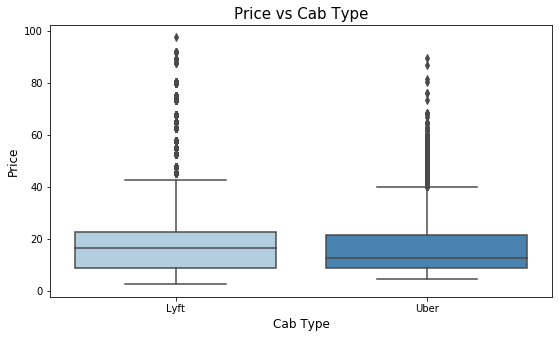

In [51]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='price', data=df6, palette="Blues")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Price", fontsize= 12)
plt.title("Price vs Cab Type", fontsize= 15)

First, we note the fact that both Uber and Lyft have very right skewed distributions. Like we discussed before, Lyft has a larger max and mean value compared to Uber and the range of distribution seems to be larger in Lyft as well. The outliers in Lyft are further away from the other values compared to Uber.

Text(0.5, 1.0, 'Price vs Cab Type (Product name included)')

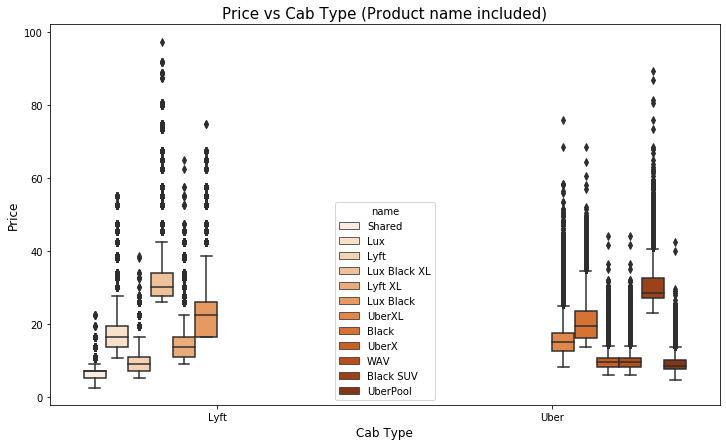

In [52]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(x='cab_type', y='price', hue='name', data=df6, palette="Oranges")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Price", fontsize= 12)
plt.title("Price vs Cab Type (Product name included)", fontsize= 15)

There are a few interesting observations that we notice from the graph. It is noted that all distributions are skewed to the right. When we look at Lyft, we immediately see that the price distributions are significantly different among all products, with Shared being the cheapest while Lux Black XL being the most expensive one. As for Uber, there are 3 products that share similar price distributions, which are UberX, WAV and UberPool, while the other 3 have different distributions.

Next, moving on to distance, we plot side by side boxplots with the same style and definition like previously.

Text(0.5, 1.0, 'Distance vs Cab Type')

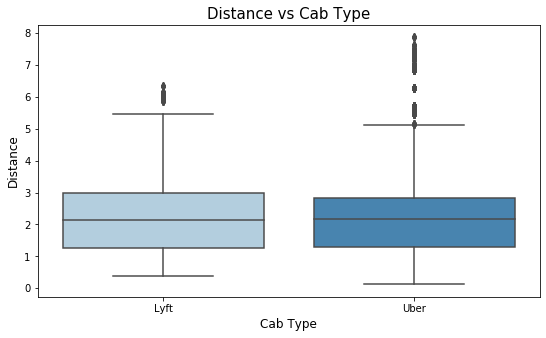

In [53]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='distance', data=df6, palette="Blues")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Distance", fontsize= 12)
plt.title("Distance vs Cab Type", fontsize= 15)

From the comparison, we can see that Uber has a larger range of distribution compared to Lyft, with a lot more outliers above the upper boundary as well. We also see that the distributions are skewed to the right. Overall, their 5 number summaries do not differ much except that the maximum (Q3 + 1.5IQR) of the boxplot is larger in Lyft compared to Uber's maximum. Note that the maximum is not the largest value we are talking about as the largest value are outliers lying outside of the maximum boundary, in which Uber's largest value is larger than Lyft's largest value.

Text(0.5, 1.0, 'Distance vs Cab Type (Product name included)')

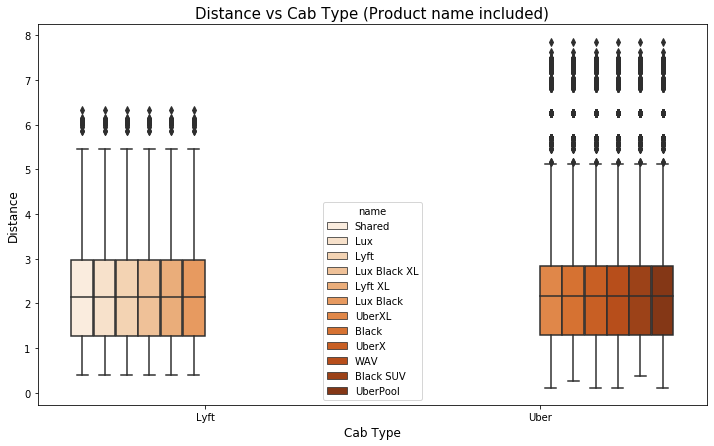

In [54]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(x='cab_type', y='distance', hue='name', data=df6, palette="Oranges")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Distance", fontsize= 12)
plt.title("Distance vs Cab Type (Product name included)", fontsize= 15)

It is clearly shown that the distribution of distance are very similar for both Uber and Lyft. However, Uber seems to have larger range of distribution with more outliers and larger variation of outliers compared to Lyft. Besides, the variation of values in the lower whisker is more noticeable in Uber as well. However, in overall we see that the product within each cab type really do not differ much, indicating that there's no interesting variation when it comes to distance within Uber and Lyft.

After that, we plot boxplots for the last column for ride columns which is the price_per_mile column.

Text(0.5, 1.0, 'Price per Mile vs Cab Type')

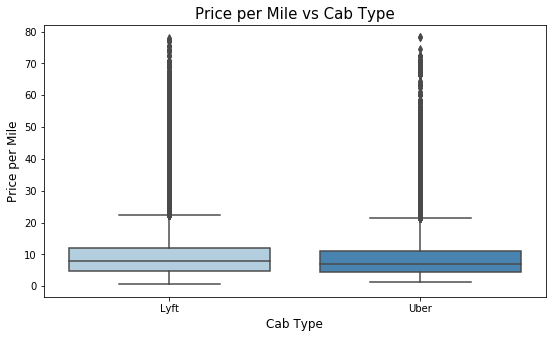

In [55]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='price_per_mile', data=df6, palette="Blues")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Price per Mile", fontsize= 12)
plt.title("Price per Mile vs Cab Type", fontsize= 15)

Although not much difference from the distributions of Lyft and Uber, they share the same pattern that both graphs are extremely skewed to the right, with a ton of outliers, ranging from 25 to values close to 80 dollars per mile.

Text(0.5, 1.0, 'Price per Mile vs Cab Type (Product name included)')

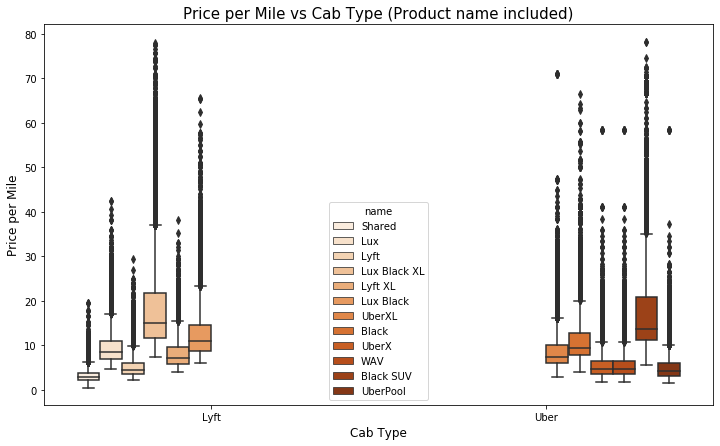

In [56]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(x='cab_type', y='price_per_mile', hue='name', data=df6, palette="Oranges")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Price per Mile", fontsize= 12)
plt.title("Price per Mile vs Cab Type (Product name included)", fontsize= 15)

Just like what we found out in price boxplots, the boxplots for price per mile are very similar to those. The order of distribution patterns seem to be similar compared to price boxplots. However, their differences in distribution variations between products within the cab types seem to be different than boxplots of price which are something interesting to point out here. This is due to the fact that the price are divided by the different values of distances.

Text(0.5, 1.0, 'Distance vs Cab Type (Short summary included)')

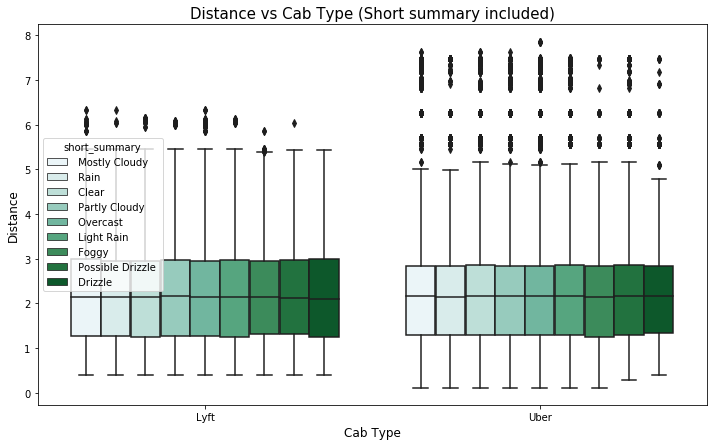

In [57]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(x='cab_type', y='distance', hue='short_summary', data=df6, palette="BuGn")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Distance", fontsize= 12)
plt.title("Distance vs Cab Type (Short summary included)", fontsize= 15)

Text(0.5, 1.0, 'Price per Mile vs Cab Type (Short summary included)')

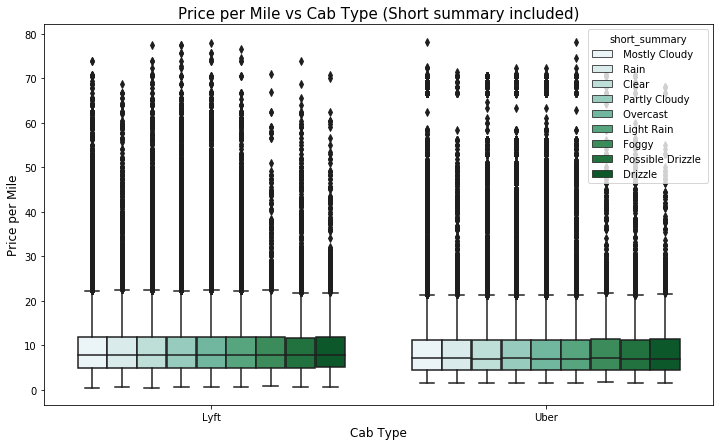

In [58]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(x='cab_type', y='price_per_mile', hue='short_summary', data=df6, palette="BuGn")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Price per Mile", fontsize= 12)
plt.title("Price per Mile vs Cab Type (Short summary included)", fontsize= 15)

When we look at the boxplots for distance, there really aren't many noticeable differences aside from the observation that Drizzle has a different distribution in Uber rides. Also for Lyft rides, the distributions of outliers are also significantly different which can be a minor but useful thing to take note of.

As for Price per Mile boxplots, it has something interesting as well although not a major findings. Despite the similar thing that the distributions are all right skewed and the boxplot distributions are almost identical, we saw that the distributions for outliers seem to be significantly varied and noticeable. For Lyft, the outliers distributions are larger when the weather is partly cloudy and overcast but smaller when weather is rain and drizzle. As for Uber, the outlier distributions are larger when the weather is mostly cloudy and light rain while the smallest identified in rain, clear and drizzle weather.

#### Weather Columns

For our case, since we only want to gain an understanding on individual weather columns for ourselves, we only pick 5 columns to visualise boxplots. These columns are temperature, windSpeed, cloudCover, moonPhase and precipIntensityMax columns. 

Let's start by plotting the boxplots for **temperature**. Since this time we are looking at weather, I want to use a weather related categorical feature to colour code the boxplots, and we will still retain the cab type when plotting multiple boxplots.

Text(0.5, 1.0, 'Temperature vs Cab Type')

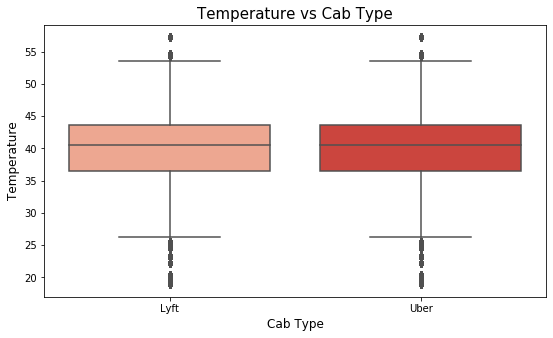

In [59]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='temperature', data=df6, palette="Reds")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Temperature", fontsize= 12)
plt.title("Temperature vs Cab Type", fontsize= 15)

From the looks of it, distributions for both Lyft and Uber are closely identical and both are also having left skewed distribution with several outliers. We couldn't find anything particularly interesting from the comparison.

We already know that the weather features are almost identical regardless of Lyft or Uber rides, so we can exclude the cab type from the boxplots.

Text(0.5, 1.0, 'Temperature vs Short summary of Weather')

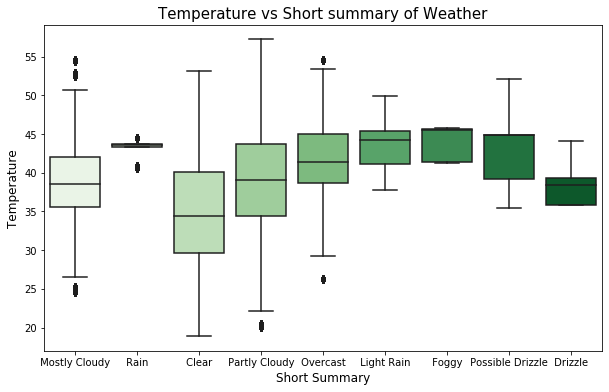

In [60]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='short_summary', y='temperature', data=df6, palette="Greens")

plt.xlabel("Short Summary", fontsize= 12)
plt.ylabel("Temperature", fontsize= 12)
plt.title("Temperature vs Short summary of Weather", fontsize= 15)

For this plot that is focusing on weather properties, it is obvious that the temperature distributions vary significantly among different summary of weathers. It is noted that the temperature distributions tend to have lower values for Clear and Drizzle weather while temperature distributions for light rain, foggy and possible drizzle tend to be higher. We also see that weather for Partly Cloudy has the largest range of distribution among the other weathers, followed by Clear weather.

The second variable that we'll be looking at is the **windSpeed** column.

Text(0.5, 1.0, 'Wind Speed vs Cab Type')

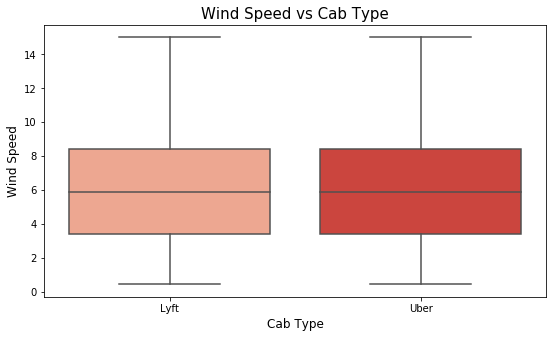

In [61]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='windSpeed', data=df6, palette="Reds")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Wind Speed", fontsize= 12)
plt.title("Wind Speed vs Cab Type", fontsize= 15)

Just like the temperature variable, distributions for both Lyft and Uber are closely identical. This time for Wind Speed, there are no outliers present in the graphs. Like previously, we couldn't find anything particularly interesting from the comparison.

Text(0.5, 1.0, 'Wind Speed vs Short summary of Weather')

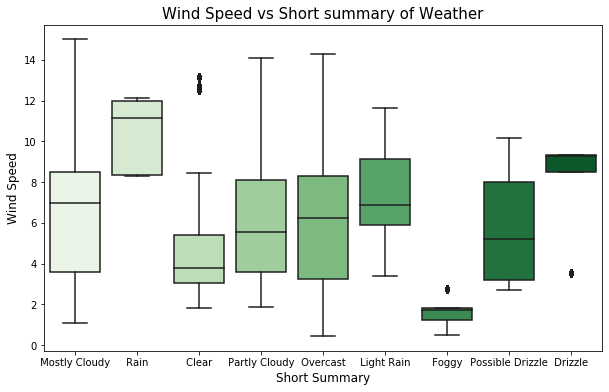

In [62]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='short_summary', y='windSpeed', data=df6, palette="Greens")

plt.xlabel("Short Summary", fontsize= 12)
plt.ylabel("Wind Speed", fontsize= 12)
plt.title("Wind Speed vs Short summary of Weather", fontsize= 15)

As expected, the distributions of wind speed vary significantly among different summary of weathers. Looking closely at the comparison, we note that distribution of wind speed for Rain weather tends to have larger values while distribution of wind speed for Foggy weather tends to be smaller. Only Clear, Foggy and Drizzle weather have outliers for this case.

The third weather variable that we'll use to plot the boxplots is the **cloud cover** variable.

Text(0.5, 1.0, 'Cloud Cover vs Cab Type')

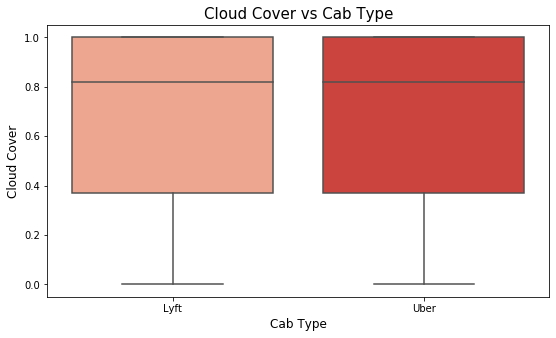

In [63]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='cloudCover', data=df6, palette="Reds")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Cloud Cover", fontsize= 12)
plt.title("Cloud Cover vs Cab Type", fontsize= 15)

Again, the distributions of Cloud cover for Lyft and Uber are almost identical. Both boxplots are showing left skewed distributions with no outliers detected. Nothing interesting to be reported here.

Text(0.5, 1.0, 'Cloud Cover vs Short summary of Weather')

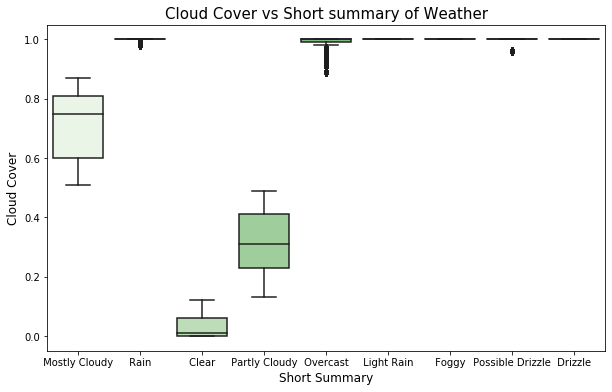

In [64]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='short_summary', y='cloudCover', data=df6, palette="Greens")

plt.xlabel("Short Summary", fontsize= 12)
plt.ylabel("Cloud Cover", fontsize= 12)
plt.title("Cloud Cover vs Short summary of Weather", fontsize= 15)

When comparing different weather summaries, we noticed that the difference in distribution variations are significant as expected. Cloud cover distributions for Rain, Overcast, Light Rain, Foggy, Possible Drizzle and Drizzle have extremely small range of distribution but their values tend to be very high, while cloud cover distribution tends to be lower for Clear weather.

The fourth variable to be visualised in the boxplots is the **moon phase** column.

Text(0.5, 1.0, 'Moon Phase vs Cab Type')

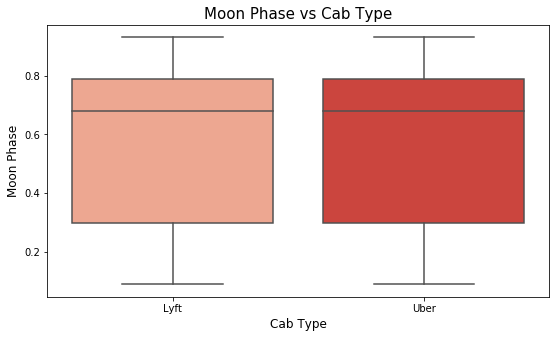

In [65]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='moonPhase', data=df6, palette="Reds")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Moon Phase", fontsize= 12)
plt.title("Moon Phase vs Cab Type", fontsize= 15)

Same like previous comparisons, the boxplots plotted for Lyft and Uber rides on Moon Phase variable are very identical. The shape of distributions are slightly left skewed with no outliers too. Overall, there is nothing that we can extract in particular.

Text(0.5, 1.0, 'Moon Phase vs Short summary of Weather')

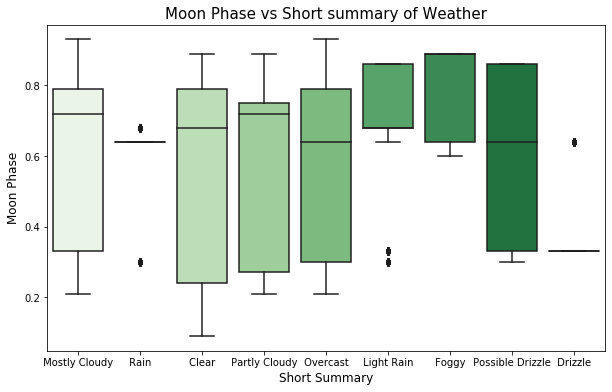

In [66]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='short_summary', y='moonPhase', data=df6, palette="Greens")

plt.xlabel("Short Summary", fontsize= 12)
plt.ylabel("Moon Phase", fontsize= 12)
plt.title("Moon Phase vs Short summary of Weather", fontsize= 15)

In comparison for Moon Phase, it seems like the distribution differences are not as big as we see from the previous variables. Moon Phase distributions for Light Rain and Foggy tend to have larger values while Drizzle weather tends to have smaller Moon Phase values. Outliers are detected in 3 weathers which are Rain, Light Rain and Drizzle.

Next, the fifth variable to be examined is the **precipIntensityMax** column, which represents the **maximum rain intensity**.

Text(0.5, 1.0, 'Maximum Precipitation Intensity vs Cab Type')

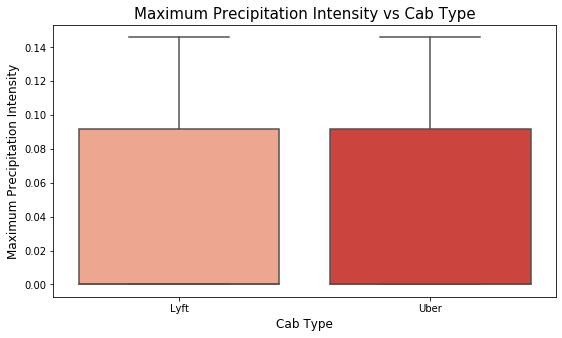

In [67]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='cab_type', y='precipIntensityMax', data=df6, palette="Reds")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Maximum Precipitation Intensity", fontsize= 12)
plt.title("Maximum Precipitation Intensity vs Cab Type", fontsize= 15)

Like previous boxplots, we see identical boxplot distributions when plotting the Maximum Precipitation Intensity for Lyft and Uber rides. Both of the boxplots are right skewed with no outliers. We can proceed with the next boxplot as there is nothing special here.

Text(0.5, 1.0, 'Maximum Precipitation Intensity vs Short summary of Weather')

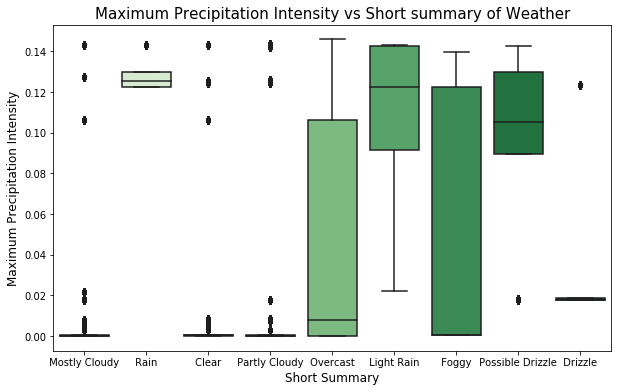

In [68]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='short_summary', y='precipIntensityMax', data=df6, palette="Greens")

plt.xlabel("Short Summary", fontsize= 12)
plt.ylabel("Maximum Precipitation Intensity", fontsize= 12)
plt.title("Maximum Precipitation Intensity vs Short summary of Weather", fontsize= 15)

For precipitation, it is expected to see the differences in different weather summaries. The rain distribution for Rain and Light Rain are obviously going to have larger values while for mostly cloudy, clear and partly cloudy are having extremely low values. However, there are some extreme outliers present for mostly cloudy, clear and partly cloudy weathers.

#### Adding Date feature to some boxplots

We still have one categorical/ordinal feature that is worth applying to boxplots, that is the day_of_week variable. Now we'll use that onto price, distance and price_per_mile comparison.

Text(0.5, 1.0, 'Distance vs Day of Week')

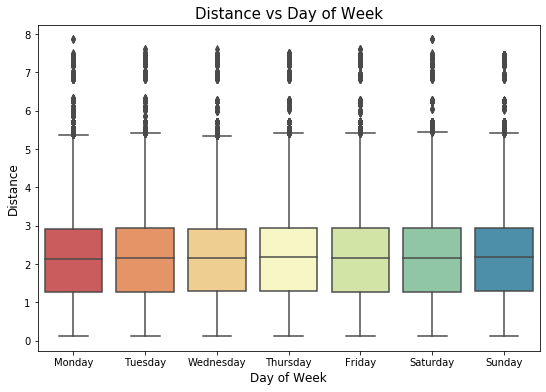

In [69]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 6))

sns.boxplot(x='day_of_week', y='distance', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            data=df6, palette="Spectral")

plt.xlabel("Day of Week", fontsize= 12)
plt.ylabel("Distance", fontsize= 12)
plt.title("Distance vs Day of Week", fontsize= 15)

There are no significant differences to be seen from the main distribution of the day of week here, but there are a few minor differences to point out from the upper observations. We notice that the outliers of distance travelled by cabs for Monday and Saturday are slightly greater than the rest of the days, with Thursday being the least for its outliers.

Text(0.5, 1.0, 'Distance vs Cab Type (day of week included)')

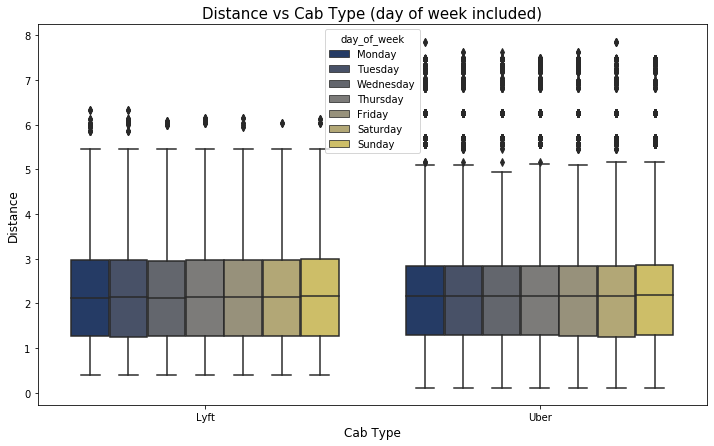

In [70]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(x='cab_type', y='distance', hue='day_of_week', hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
            data=df6, palette="cividis")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Distance", fontsize= 12)
plt.title("Distance vs Cab Type (day of week included)", fontsize= 15)

When we separate the Lyft and Uber rides and observe separately, we obtain some new findings. Looking at Lyft rides, we discover the thing that the days that have the largest distance distribution range are Monday and Tuesdays for the outliers, with Saturday being the least with only a few outliers. For Uber, the outlier distributions are the largest for Monday and Saturday, with Thursday having the smallest range of distribution. We also noted that the main distribution of Uber on Wednesday seems to have a smaller range than the rest. Due to the larger percentage of Uber observations, it could be possible that it contributes to the larger distance distribution range in Uber compared to Lyft for all days of the week.

Text(0.5, 1.0, 'Price vs Day of Week')

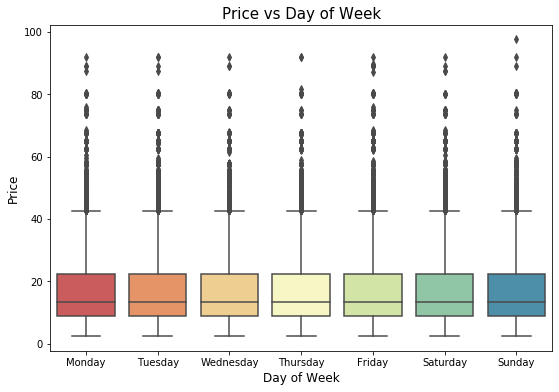

In [71]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 6))

sns.boxplot(x='day_of_week', y='price', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            data=df6, palette="Spectral")

plt.xlabel("Day of Week", fontsize= 12)
plt.ylabel("Price", fontsize= 12)
plt.title("Price vs Day of Week", fontsize= 15)

For the price variable, the main price distribution seems to be similar across different days of week. However, there are some minor differences when we observe the outliers. It is quite notable that Sunday has more extreme outliers above the upper boundary compared to the rest of the days, giving Sunday a larger range of distribution in overall. This could mean that the fares on Sunday can be relatively more expensive. We have to verify that later.

Text(0.5, 1.0, 'Price vs Cab Type (day of week included)')

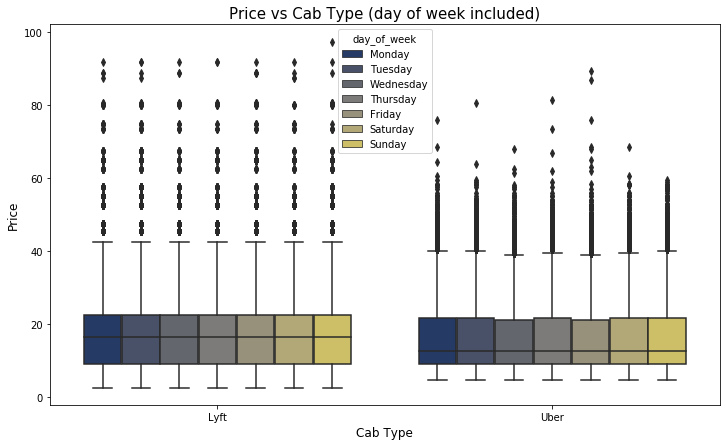

In [72]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(x='cab_type', y='price', hue='day_of_week', hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
            data=df6, palette="cividis")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Price", fontsize= 12)
plt.title("Price vs Cab Type (day of week included)", fontsize= 15)

This is where it gets more interesting when we separate the boxplots into Lyft and Uber rides, as the differences are more significant than usual. For Lyft, we get the same discovery that Sunday tends to have more extreme outliers with a larger range of distribution on the upper side compared to others. As for Uber, we get different patterns. The extreme outliers tend to appear more on Friday and give it a larger range of price distribution, while Sunday has the least extreme outliers with the smallest range of distribution of price. From the looks of it, it seems that the price difference of Uber is a lot more noticeable across different days compared to Lyft, a significant pattern that we managed to observe.

Text(0.5, 1.0, 'Price per Mile vs Day of Week')

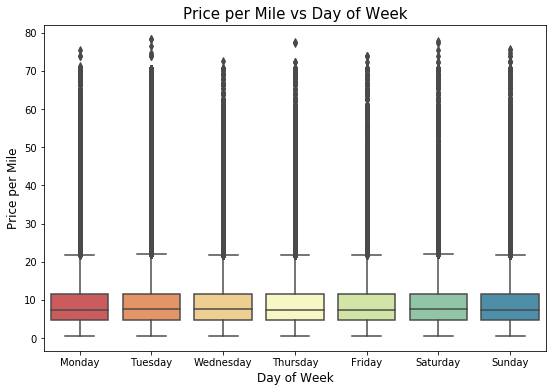

In [73]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9, 6))

sns.boxplot(x='day_of_week', y='price_per_mile', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            data=df6, palette="Spectral")

plt.xlabel("Day of Week", fontsize= 12)
plt.ylabel("Price per Mile", fontsize= 12)
plt.title("Price per Mile vs Day of Week", fontsize= 15)

When distance is combined with price to produce price per mile variable, we get different results compared to price alone. Although the main distributions are very similar across different days, the outliers are definitely different. From the graph, we observe that Tuesday and Saturday tend to have more extreme outliers, with Wednesday showing the least extremes for price per mile variable. Let's look at the next comparison and see what we can get.

Text(0.5, 1.0, 'Price per Mile vs Cab Type (day of week included)')

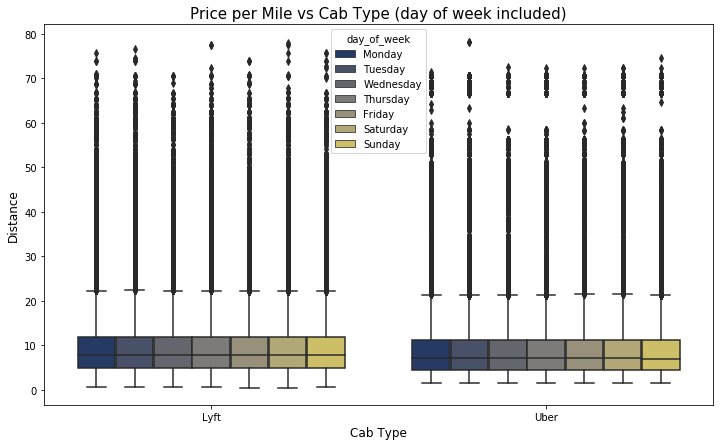

In [74]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(x='cab_type', y='price_per_mile', hue='day_of_week', hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
            data=df6, palette="cividis")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Distance", fontsize= 12)
plt.title("Price per Mile vs Cab Type (day of week included)", fontsize= 15)

This comparison yields some interesting findings for price per mile variable that we should discuss. For Lyft, the price rate distribution are very similar around the mean distribution, but when looking at outliers, it is not the same. For outliers, Thursday and Saturday tend to have more extreme outliers and this gave both days a larger range of distribution, and Wednesday have less extreme outliers. As for Uber, the main distribution around the mean is same across the days as well, with notable differences in the outlier distributions. Tuesday and Sunday tend to have more extreme outliers while the rest of the 5 days share similar outlier distributions.

#### Using Destination as our boxplot feature

From my general perspective, it is probable that the destination of the travel plays a significant role in determining the pricing of the cab service. Thus, we should investigate and compare them. We ignore source of travel for now because generally, source is not as impactful as the travel destination.

Text(0.5, 1.0, 'Price vs Destination')

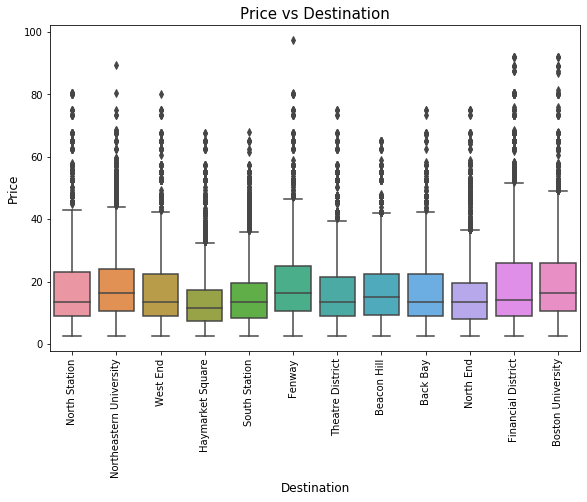

In [75]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9.5, 6))

sns.boxplot(x='destination', y='price', data=df6)

plt.xlabel("Destination", fontsize= 12)
plt.ylabel("Price", fontsize= 12)
plt.xticks(rotation = 90)
plt.title("Price vs Destination", fontsize= 15)

Indeed, the graph yields some interesting results to be examined. In terms of median, we found out that travelling to Northeastern University tends to have higher median price, followed by Fenway. As for the opposite, travelling to Fenway has lower median price compared to the other destinations. In terms of outliers, we noticed that going to Financial District and Boston University by cab tend to charge more extreme prices, and travelling to Fenway may have rare but the most extreme prices to be charged. For the less extreme outliers, we see that going to Beacon Hill is more likely to be charged the least extreme prices. Overall, the comparisons are interesting and significant.

Text(0.5, 1.0, 'Price vs Cab Type (destination included)')

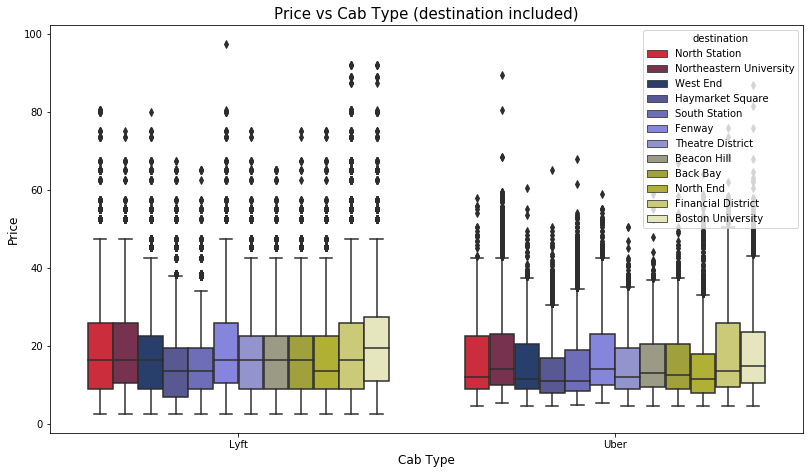

In [76]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(13.5, 7.5))

sns.boxplot(x='cab_type', y='price', hue='destination', data=df6, palette="gist_stern")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Price", fontsize= 12)
plt.title("Price vs Cab Type (destination included)", fontsize= 15)

It is even more interesting when we separate the boxplots into individual cab types of Lyft and Uber. The variations of price are noticeable and impactful which can be important for modeling and prediction later.

##### Lyft:

- In terms of median prices, travelling to Boston University has the highest median price, while travelling to North End has the lowest median price.
- For the upper boundary outliers, going to Financial District and Boston University tend to be charged more extreme prices, with Fenway being charged a much extreme price than all destination outlier prices. On the other hand, South Station and Beacon Hill tend to have less extreme fare charges above the upper boundary compared to other destinations

##### Uber:

- In terms of median, just like Lyft, going to Boston University by cab yields the highest median price, while going to Haymarket Square and South Station have the lowest median price.
- For the outliers above the upper boundary, travelling to Northeastern University and Boston University have more extreme prices being charged while going to Theatre District have the least extreme prices in the outliers compared to the rest of the destinations for Uber.

Text(0.5, 1.0, 'Price per Mile vs Destination')

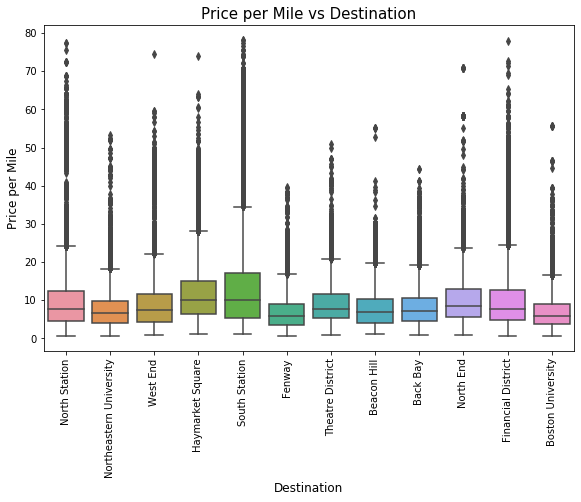

In [77]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(9.5, 6))

sns.boxplot(x='destination', y='price_per_mile', data=df6)

plt.xlabel("Destination", fontsize= 12)
plt.ylabel("Price per Mile", fontsize= 12)
plt.xticks(rotation = 90)
plt.title("Price per Mile vs Destination", fontsize= 15)

When we look at price per mile which is the pricing rate, the results are quite different from price variable alone. In terms of median price rate, going to Haymarket Square and South Station have the highest median price per mile which is totally different from what we seen in price comparison. For the lowest value, travelling to Fenway and Boston University have the lowest median price per mile which is also different from before. For upper outliers, travelling to South Station yields the most extreme price rates compared to other destinations while going to Fenway has the least extreme price rates among all destinations.

Text(0.5, 1.0, 'Price per Mile vs Cab Type (destination included)')

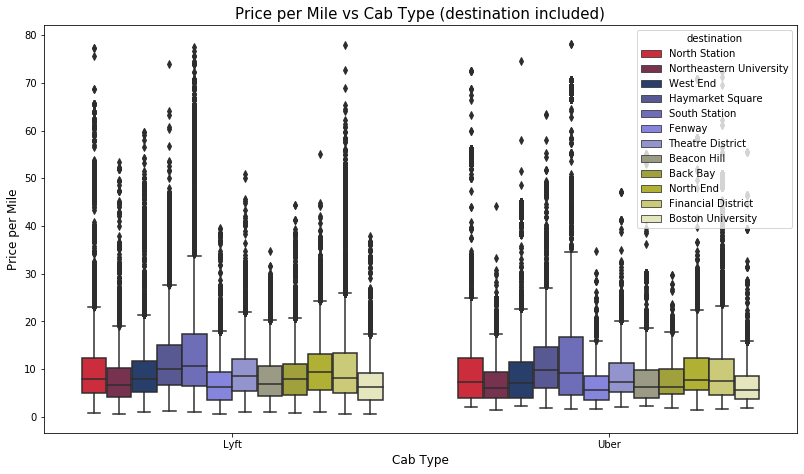

In [78]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(13.5, 7.5))

sns.boxplot(x='cab_type', y='price_per_mile', hue='destination', data=df6, palette="gist_stern")

plt.xlabel("Cab Type", fontsize= 12)
plt.ylabel("Price per Mile", fontsize= 12)
plt.title("Price per Mile vs Cab Type (destination included)", fontsize= 15)

It is pretty surprising that price per mile behaves different from price alone, that the destinations with the more expensive prices become less expensive when converted to price rate.

##### Lyft:

- In terms of median prices, travelling to South Station has the highest median price, while travelling to Boston University has the lowest median price.
- For the upper boundary outliers, going to North Station, South Station and Financial District tend to be charged more extreme prices than all destination's outlier prices. On the other hand, Beacon Hill and Boston University tend to have less extreme fare charges above the upper boundary compared to other destinations

##### Uber:

- In terms of median, going to Haymarket Square by cab yields the highest median price, while going to Boston University and Fenway have the lowest median price.
- For the outliers above the upper boundary, travelling to South Station and North Station have more extreme prices being charged while going to Back Bay and Fenway have the least extreme prices in the outliers compared to the rest of the destinations for Uber.

#### Analysing Price Rate with Path

Text(0.5, 1.0, 'Price per Mile vs Path for Lyft')

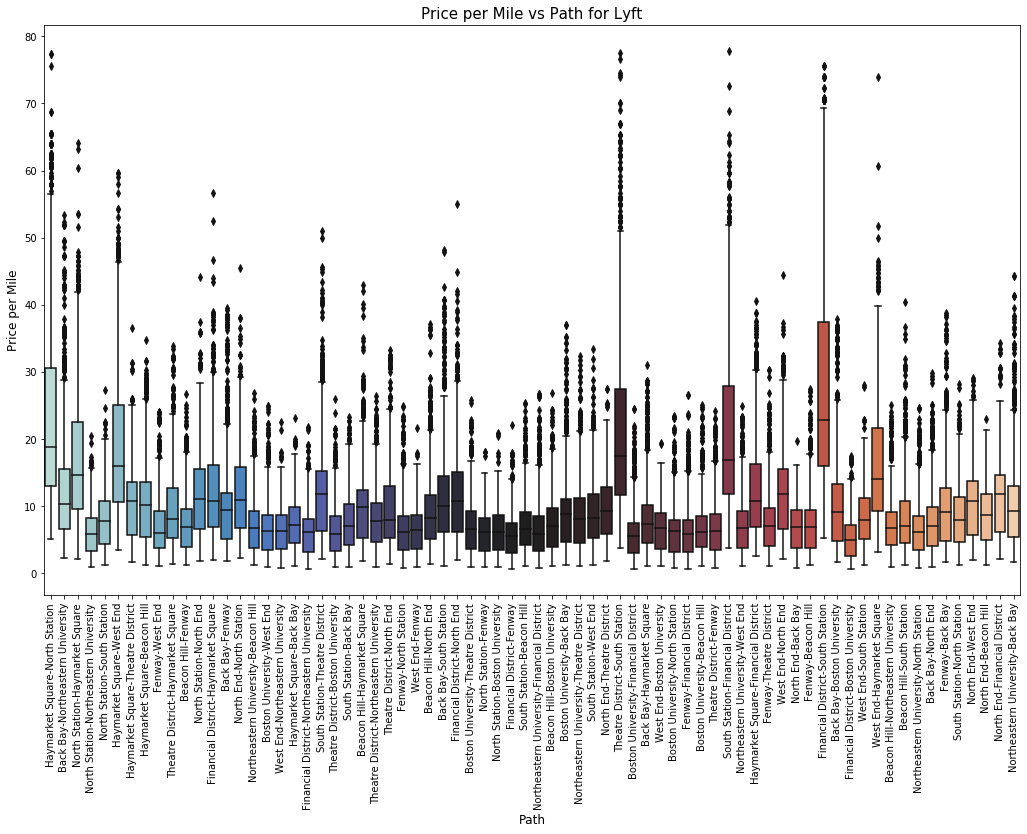

In [166]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(17.5, 10.5))

sns.boxplot(x='path', y='price_per_mile', data=df6[df6['cab_type'] == 'Lyft'], palette="icefire")

plt.xlabel("Path", fontsize= 12)
plt.ylabel("Price per Mile", fontsize= 12)
plt.xticks(rotation = 90)
plt.title("Price per Mile vs Path for Lyft", fontsize= 15)

Text(0.5, 1.0, 'Price per Mile vs Path for Uber')

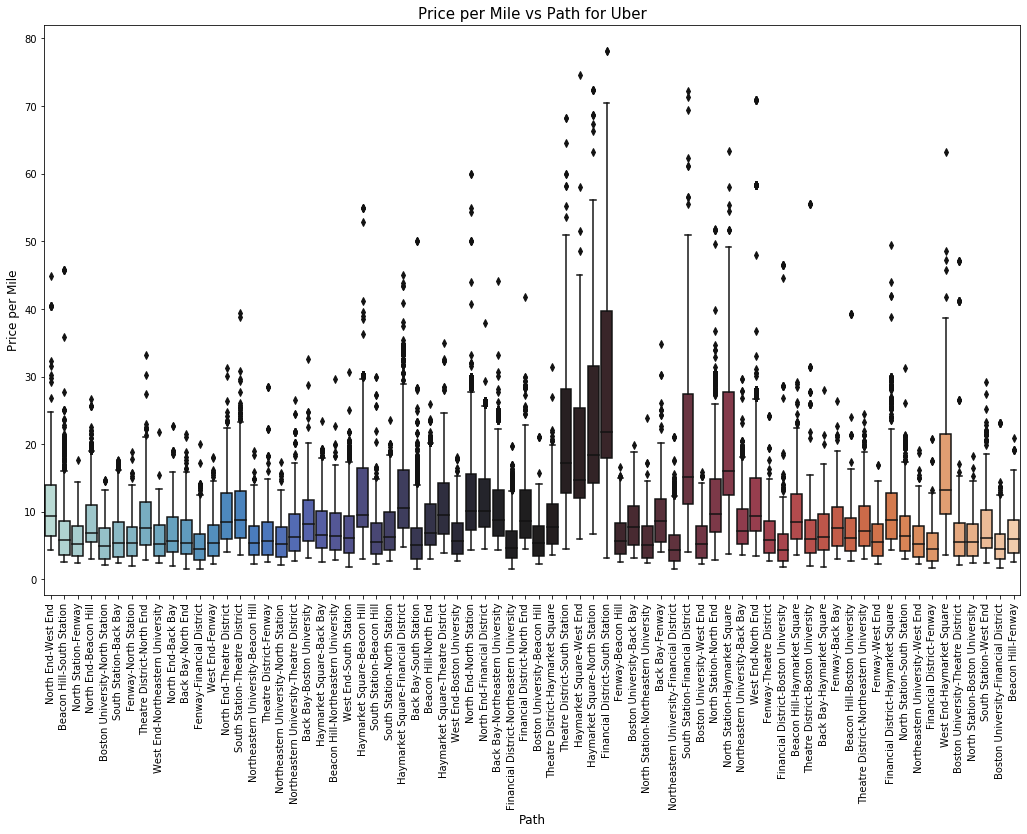

In [167]:
# Set the plot figure size before plotting anything
fig, ax = plt.subplots(figsize=(17.5, 10.5))

sns.boxplot(x='path', y='price_per_mile', data=df6[df6['cab_type'] == 'Uber'], palette="icefire")

plt.xlabel("Path", fontsize= 12)
plt.ylabel("Price per Mile", fontsize= 12)
plt.xticks(rotation = 90)
plt.title("Price per Mile vs Path for Uber", fontsize= 15)

Although it is very hard to interpret the boxplots above due to too many items in a single variable, we have to admit the fact that the path of travel does indeed have some influence towards the price rate of cab travel. This is explained by the big variations across different travel paths. Some paths have very low price rate per mile, like going from Northeastern University to Financial District. However, some paths have really high rate of price, like for example, travelling from Financial District to South Station. This variable can be really important for machine learning later!

### Histogram and Scatterplot

Since we have a ton of columns and some categorical variables, we can use pairplots to visualize histograms and scatterplots together in one graphical matrix. We will try to plot a few pairplots to cover the significant variables that we would like to observe so that we can observe the shape and direction of variable distributions and at the same time looking at numerical relationship between different variables.

In [79]:
columns = ["price", "distance", "temperature", "humidity", "windSpeed", "windGust", "visibility", 
           "pressure", "cloudCover", "moonPhase", "precipIntensityMax", "price_per_mile", "cab_type", "name"]

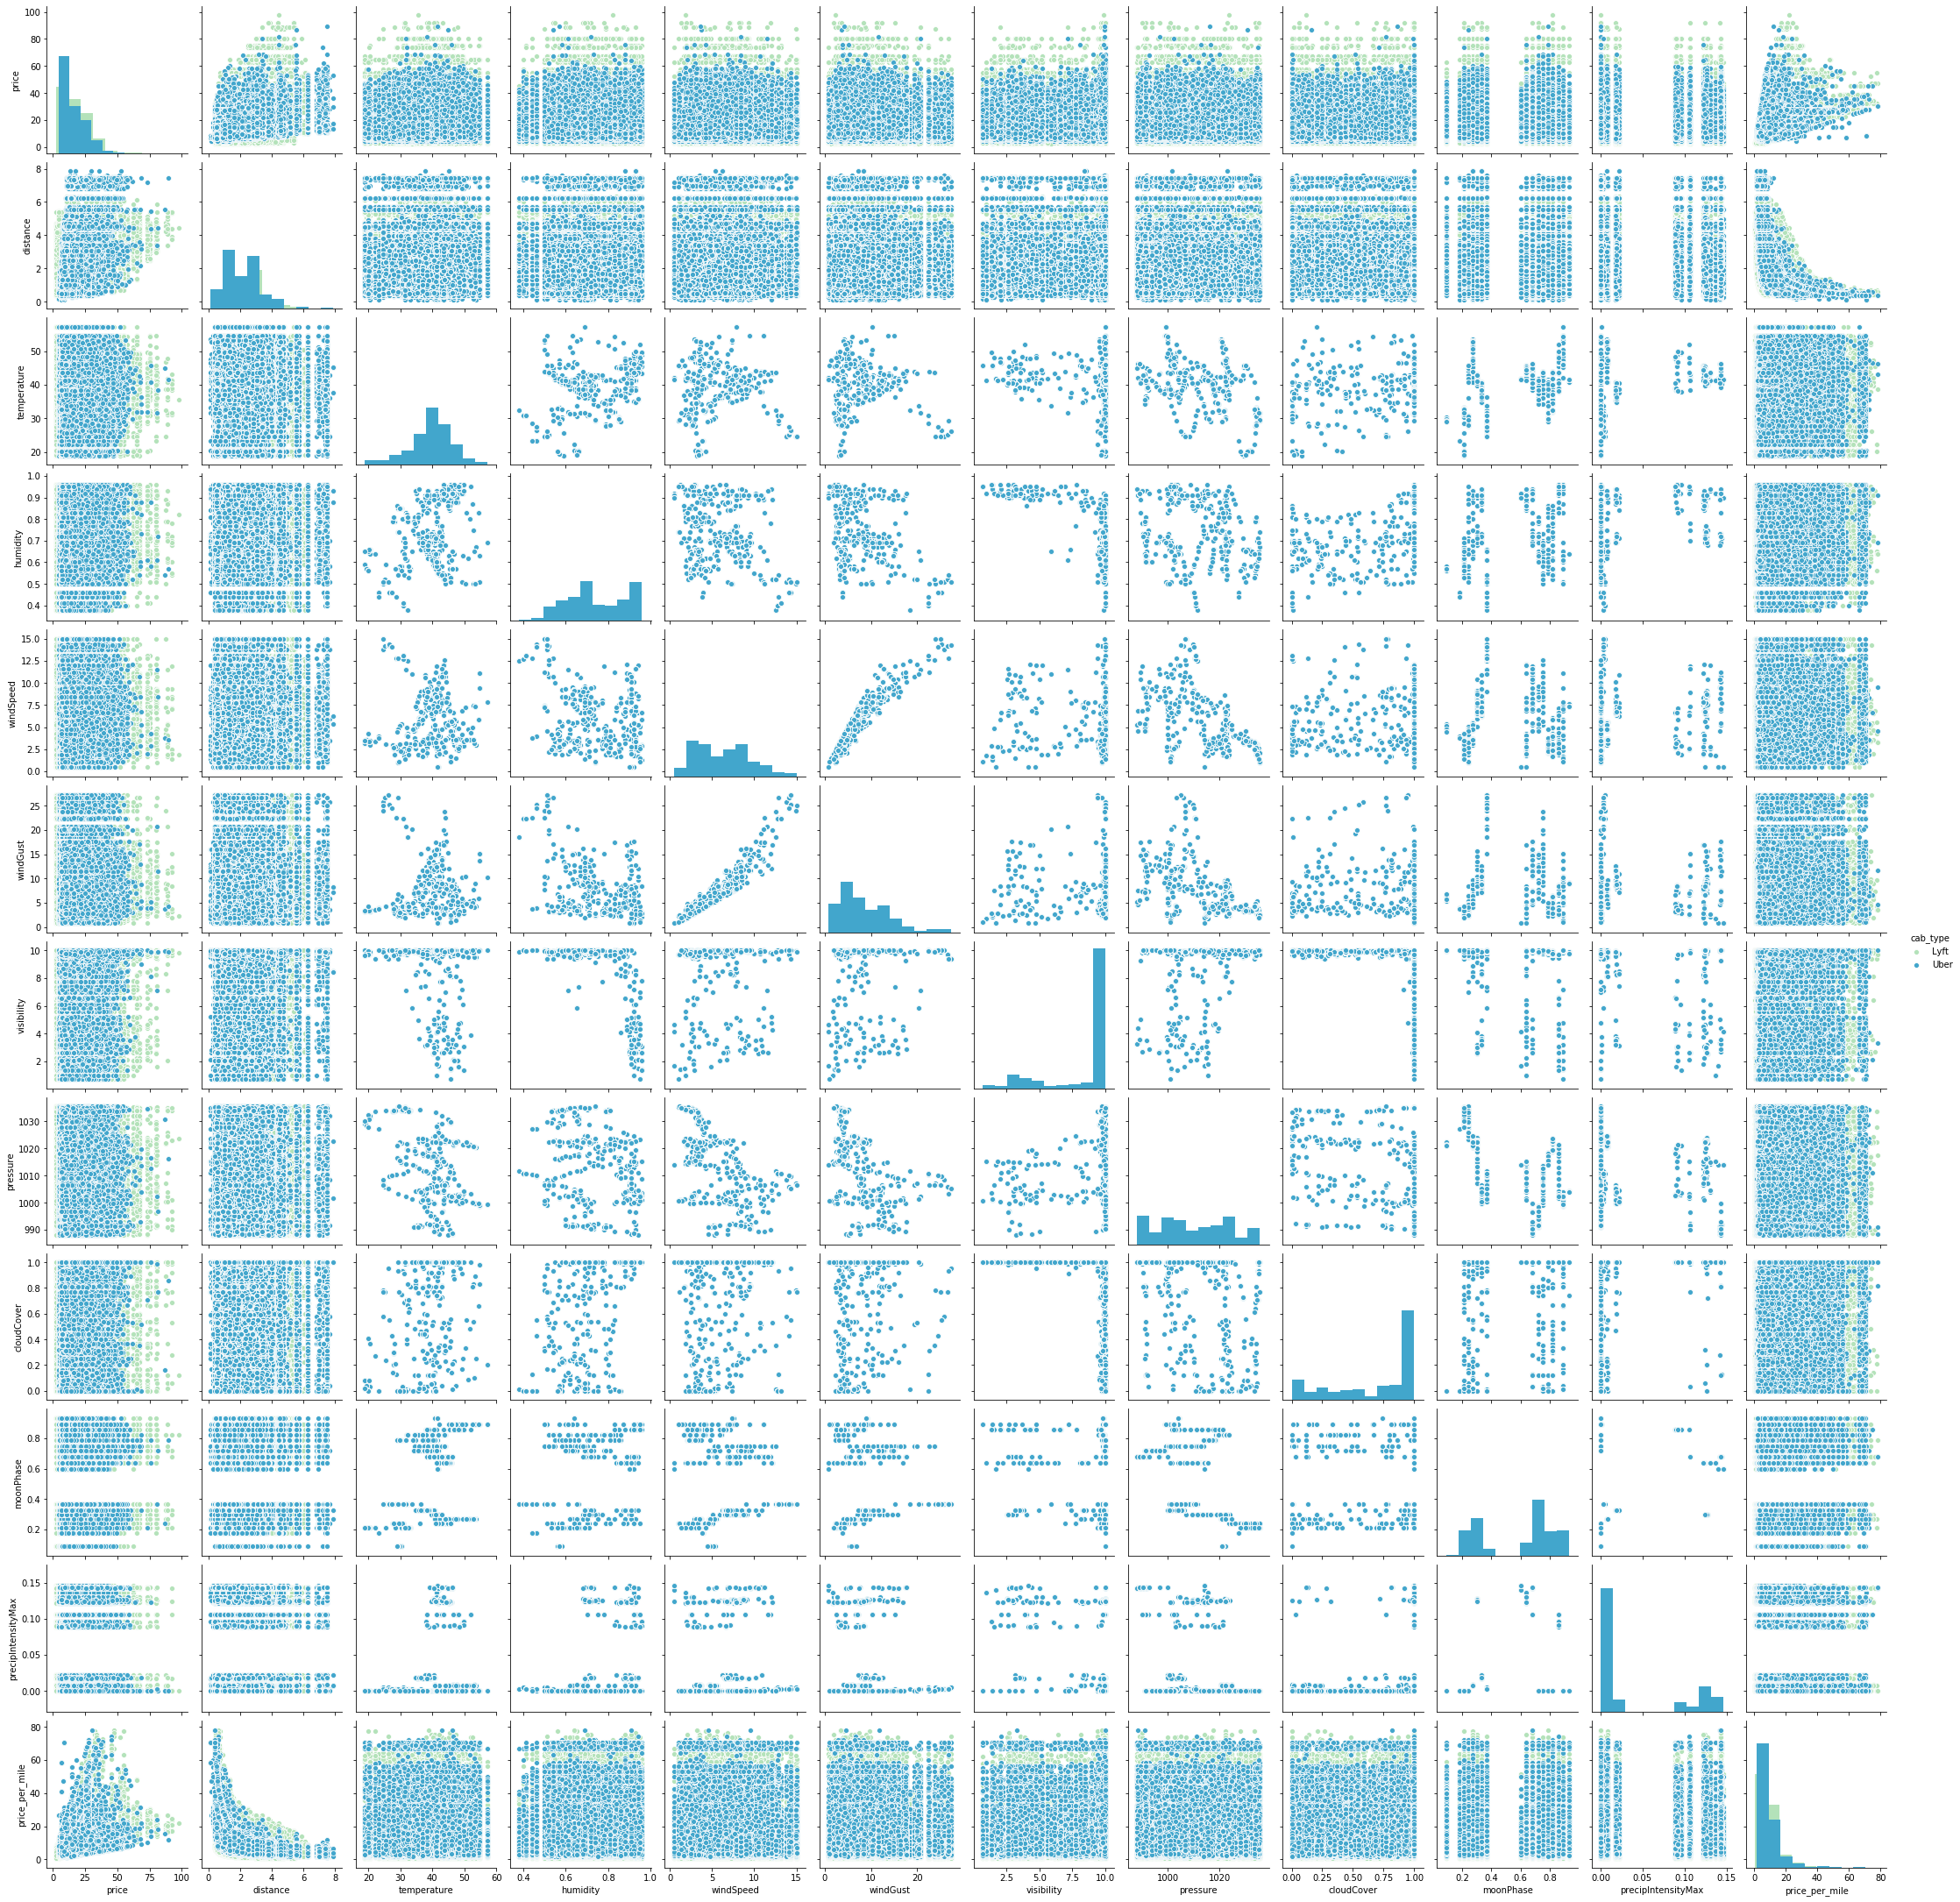

In [80]:
sns.pairplot(df6[columns], hue = 'cab_type', palette = "GnBu", diag_kind="hist")

The pairplot above displays some interesting findings but at the same time showing results that are not particularly significant. We will start by talking about histograms then followed by scatterplot. For scatterplots, we will break this down into ride and weather columns to analyse accordingly.

#### Histogram:

- Shape/Skewness: There are several shape and distribution of histograms observed in the pairplot. For ride columns, all 3 columns have right skewed distribution. As for weather columns, temperature follows the normal distribution. For skewness, humidity, visibility, cloud cover and maximum precipitation intensity have left skewed distribution while wind speed, wind gust and pressure have right skewed distribution. However, moon phase have irregular distribution shape.
- Peak: Price, temperature, wind gust and price_per_mile have unimodal distribution while distance, humidity, wind speed, cloud cover, moon phase and maximum precipitation intensity have bimodal distribution with 2 peaks. Pressure have multimodal distribution which identifies several irregular peaks.

#### Scatterplot:

*Ride columns:* 

- We identified positive correlation between price and distance and also between price and price_per_mile. 
- Besides that, we also observed negative correlation between price_per_mile and distance.

*Weather columns:*

- Temperature has medium positive relationship with humidity, wind speed and wind gust.
- Humidity has medium negative relationship with wind speed and wind gust.
- Wind speed has strong positive relationship with wind gust.
- Pressure has medium positive relationship with visibility, but medium negative relationship with wind speed and wind gust.
- Cloud cover has weak positive relationship with temperature and humidity.
- Moon phase has medium positive relationship with temperature and weak positive relationship with humidity. It also has weak negativev relationship with wind speed and wind gust but medium negative relationship with pressure.
- Maximum precipitation intensity has medium positive relationship with temperature and humidity and weak negative relationship with wind speed, wind gust and pressure.

**Uber & Lyft Comparison:**

- In comparison, apart from the fact that Lyft rides tend to have higher prices range and higher price per mile range distributions compared to Uber rides, there is really nothing much to be compared here as we couldn't find any significant differences between the cab types from the remaining features.
- The weather variables are almost identical regardless of cab types, just like what we discovered when plotting boxplots.

For convenience purpose, we want to closely observe the scatterplots for the next few pairplots so we'll only pick a few weather columns to visualize (the 5 that we used for boxplots).

In [81]:
columns = ["price", "distance", "temperature", "windSpeed", "cloudCover", "moonPhase", "precipIntensityMax", 
           "price_per_mile", "cab_type", "name"]

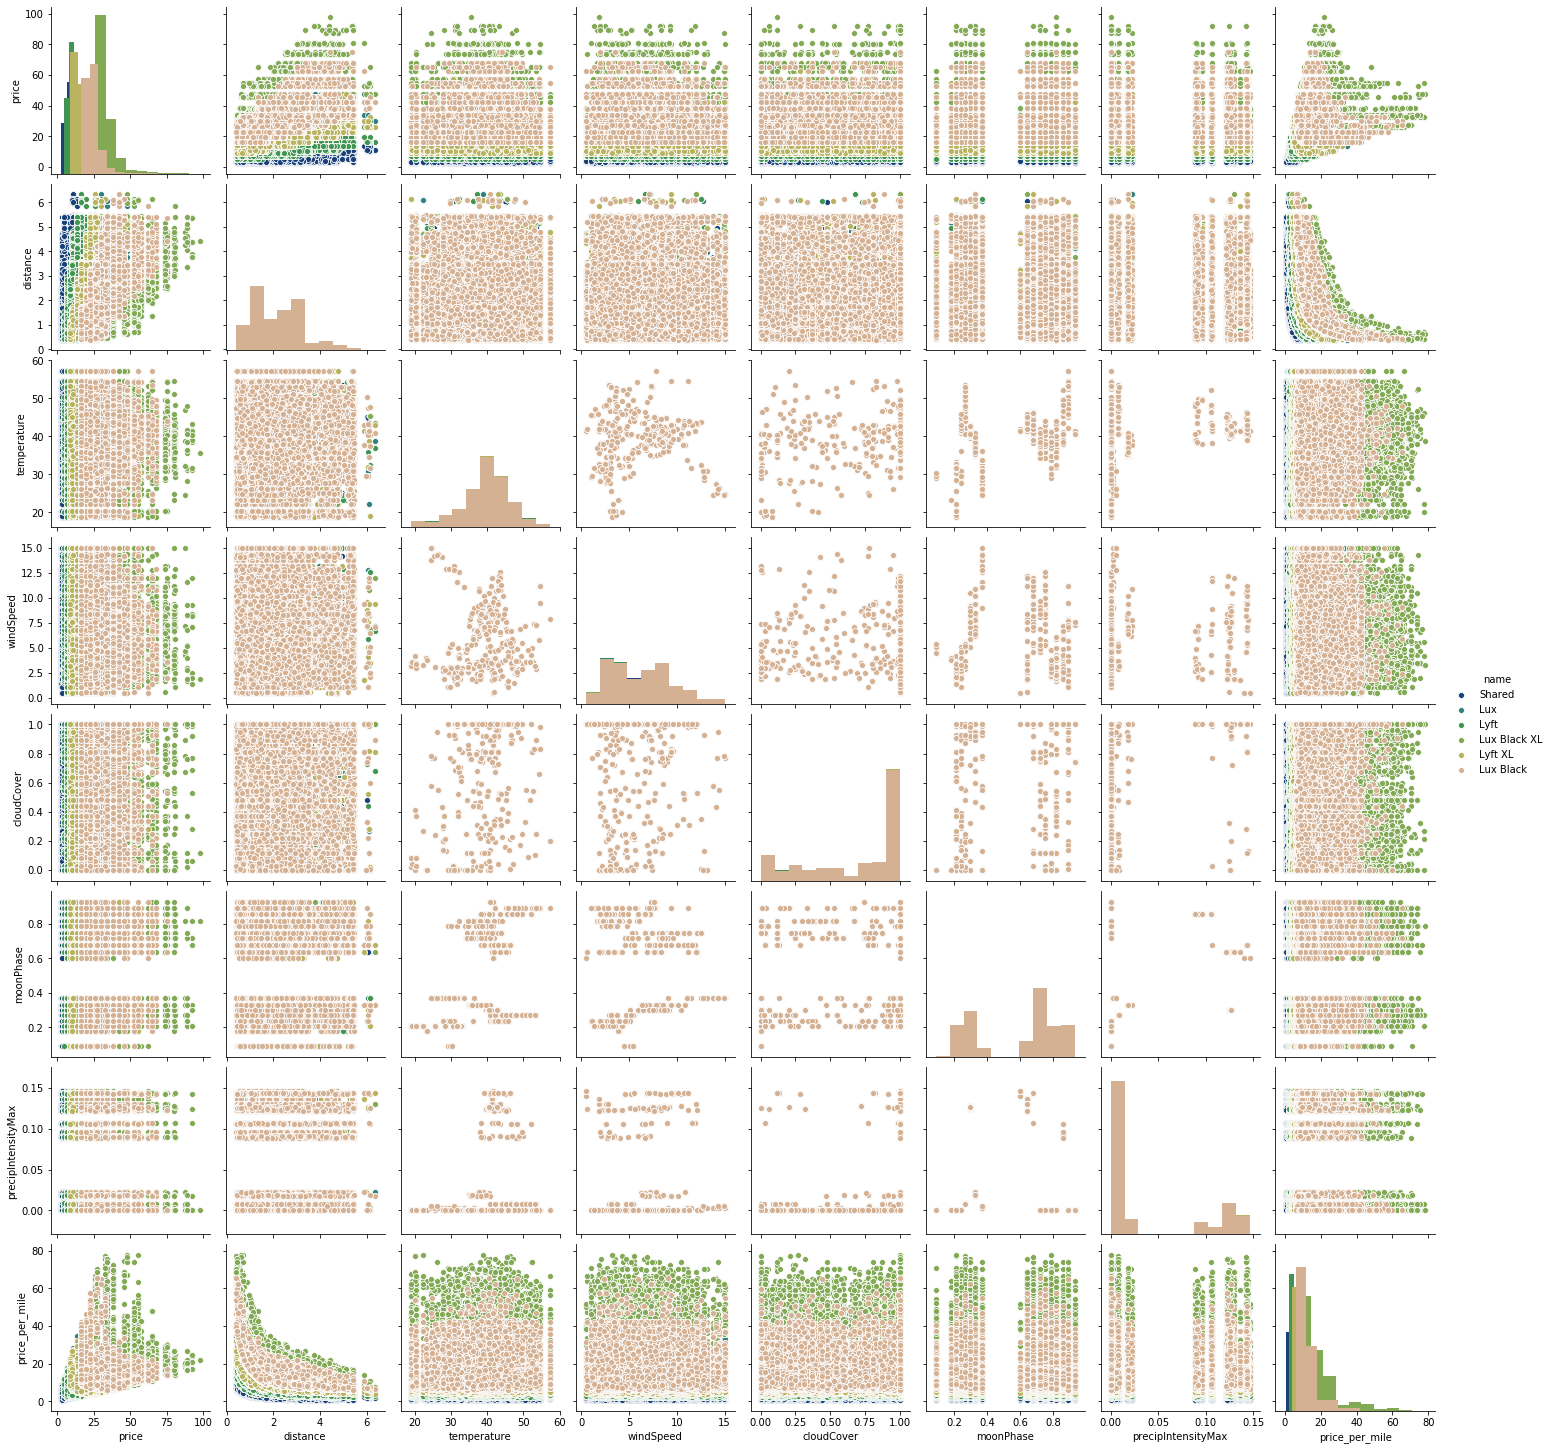

In [82]:
# Pairplot for Lyft rides with product names hue
sns.pairplot(df6[df6['cab_type'] == 'Lyft'][columns], hue = 'name', palette = "gist_earth", diag_kind="hist")

There are really not much variations if we compared this pairplot to the previous one, especially for the weather features. One notable findings to talk about here is the presence of clusters when we apply product names to colour code the points, particularly when we have price and price_per_mile in our scatterplots. This is expected because every product offered by the cab service targets a segment of customers with different pricings. For example, the green cluster which represents Lux Black XL tend to have higher prices and Lux Black occupies the mid range prices while Lux which is displayed in dark blue have very low price value distributions. Overall, it indicates that weather column may have minor but not noticeable influences towards prices. We'll see about that later.

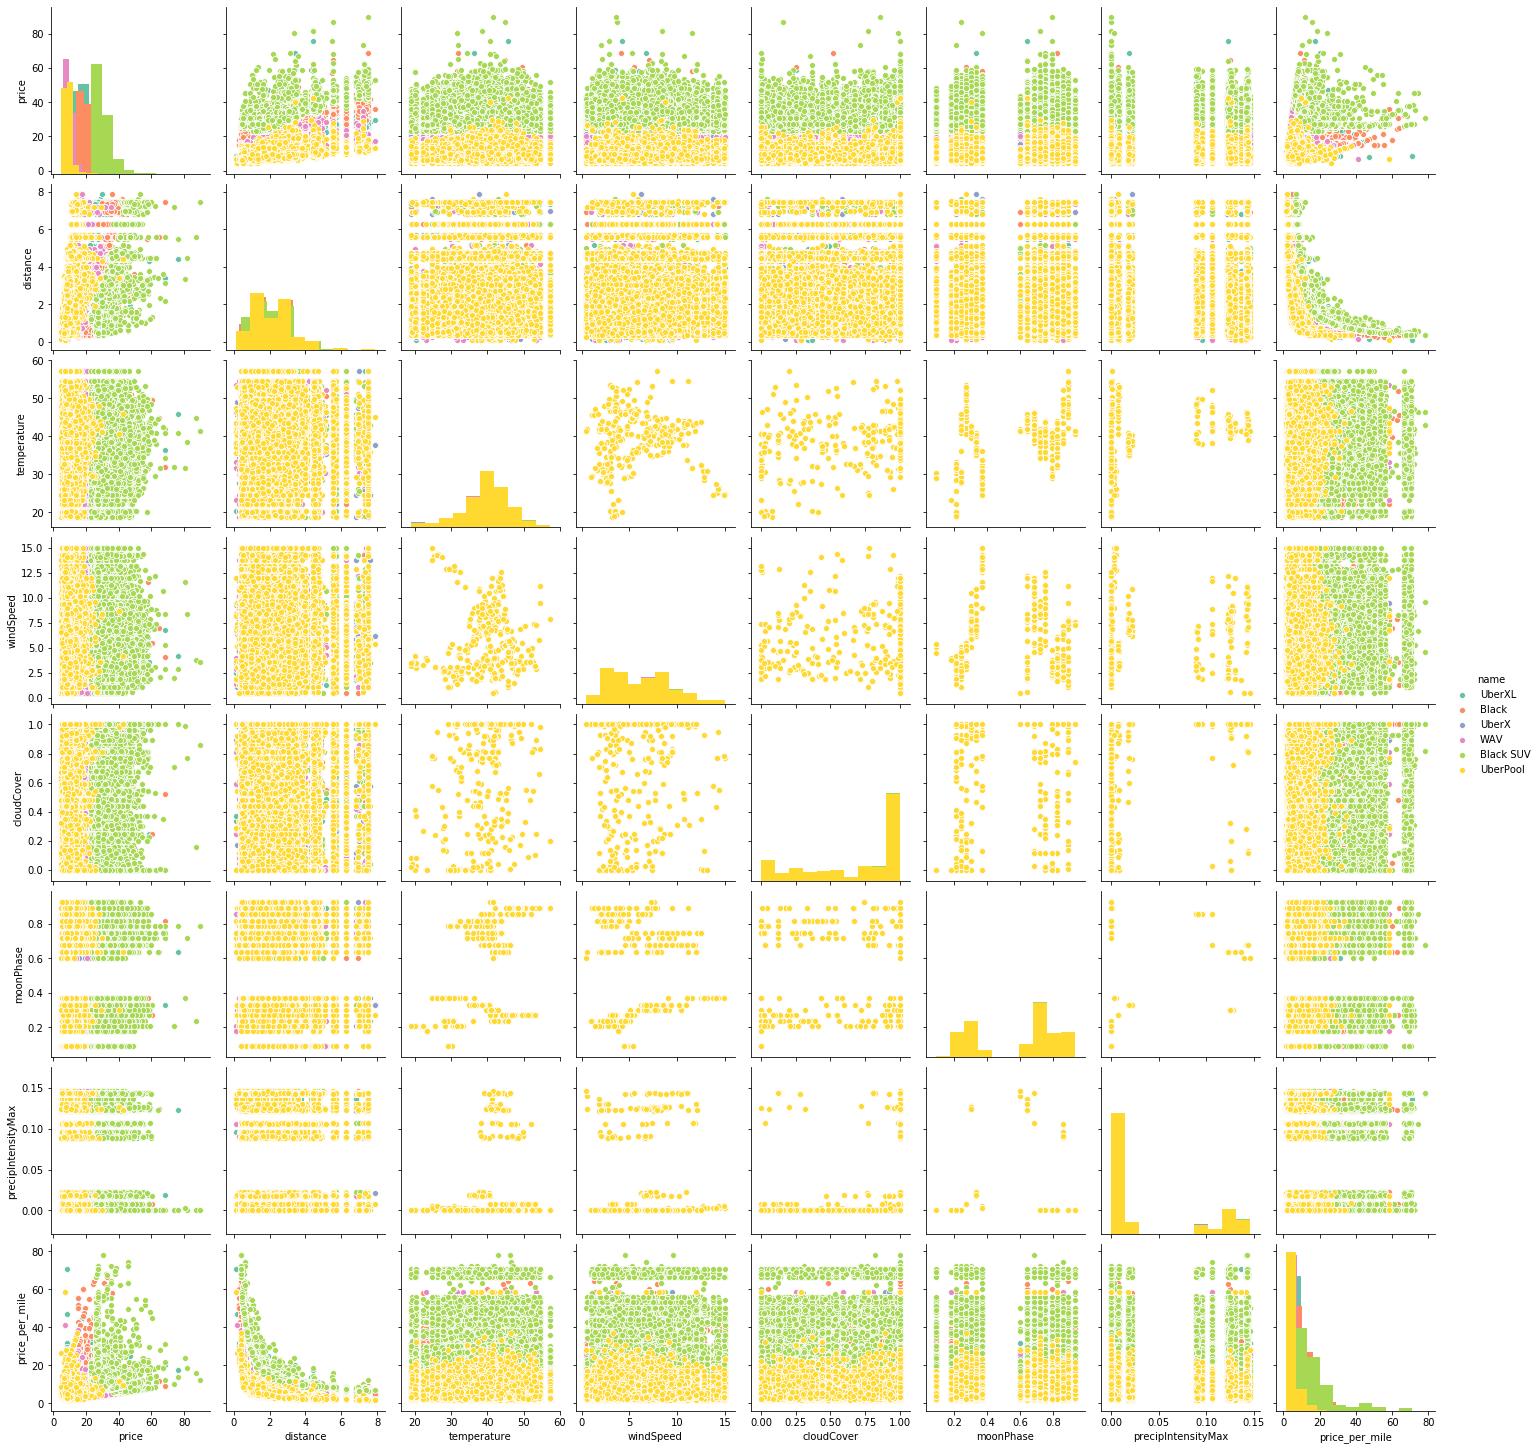

In [83]:
# Pairplot for Uber rides with product names hue
sns.pairplot(df6[df6['cab_type'] == 'Uber'][columns], hue = 'name', palette = "Set2", diag_kind="hist")

Again, we discovered similar result from the previous pairplots showing the fact that weather columns display similar patterns with negligible variations even when applying colour codes for product types, just like the Lyft pairplot in which the correlations among weather features follow the pattern from the first pairplot. Like we expect from Lyft, Uber also display clusters for different products when it comes to price and price_per_mile. For example, Black SUV that is represented by green cluster shows higher prices while Uber Pool that is being displayed in yellow shows lower price than the other products offered by Uber, and 2 products that are WAV and Black with the red and purple clusters occupying themselves in the mid price ranges. Once again, we found that weather columns have very small effect on prices that is almost unnoticed. Perhaps the correlation heatmap will tell us more about it.

### Bar Chart

Bar charts are useful when we want to compare categorical or ordinal features. It is simple but important to display the counts and changes in counts over a certain variable for different categories in order to observe patterns.

We are going to break this down into several sections as well to observe categorical or ordinal features separately. The focuses that we'll be emphasizing is in terms of datetime, cab types, product names, destination/source, short summary and long summary.

#### Cab Types and Product Names

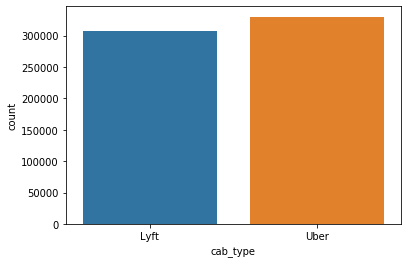

In [84]:
# Plot the count bar plot
sns.countplot(x="cab_type", data=df6)
plt.show()

As you can see from the graph, we see that Uber has slightly more counts than Lyft by just a little bit. Overall, the distribution count of Lyft and Uber doesn't vary too much. Let's move on to the next bar plot by adding product names into the new graph.

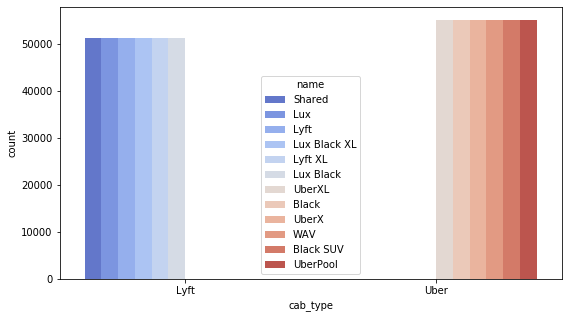

In [85]:
# Plot the count bar plot
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(x="cab_type", hue="name", data=df6, palette="coolwarm")
plt.show()

We can clearly notice that the count distribution for each products within each cab types are almost the same with no variation being observed, no matter Lyft or Uber rides. Aside from the fact that total Uber counts are more than Lyft, there is nothing to be seen by adding product names into the bar graph.

#### Applying Date and Time

##### 1. Month

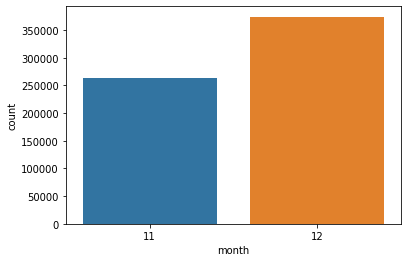

In [86]:
# Plot the count bar plot for month
sns.countplot(x="month", data=df6)
plt.show()

Since this dataset contains data from 26 November 2018 to 18 December 2018, so it is very much expected that the count for December is significantly greater than November. Thus, there is nothing significant to be seen as well.

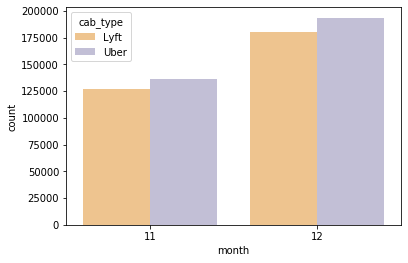

In [87]:
# Plot the count bar plot for month with cab type
sns.countplot(x="month", hue="cab_type", data=df6, palette="PuOr")
plt.show()

From the info obtained in the Kaggle description, it says that the raw dataset contains 56% of Uber data and 44% of Lyft data. As observed, the number of Uber rides are greater than Lyft for both November and December. Even after we dropped some Uber rows, the total number of observations for Uber is still significantly greater than Lyft and it is all due to the nature of the raw dataset. This means that the count difference is not statistically meaningful.

The next 2 bar plots will be focusing on Uber and Lyft individually with product names.

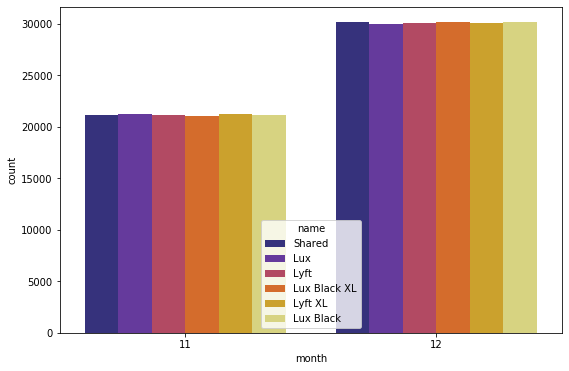

In [88]:
# Plot the Lyft count bar plot for month with name
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x="month", hue="name", data=df6[df6['cab_type'] == 'Lyft'], palette="CMRmap")
plt.show()

There are some minor but notable findings to be seen from the comparison of product names for different months. First, we found out that the ride count for Lux and Lyft XL are greater than the rest of the products, with Lux Black XL being the least in November. For the month of December, Shared and Lux Black XL are having the most count with Lux being the least, which is not the same as what we saw in November. Perhaps there are some hidden reasons to explain this difference. Unfortunately, this graph alone couldn't truly explain much because of the nature of the dataset that did not contain the complete data for each month.

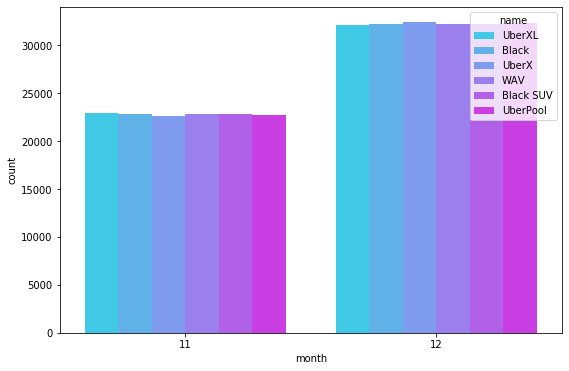

In [89]:
# Plot the Uber count bar plot for month with name
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x="month", hue="name", data=df6[df6['cab_type'] == 'Uber'], palette="cool")
plt.show()

Just like Lyft rides, there are some minor variations to be discussed for the month of November and December in terms of different products. We discovered that UberXL has the most count on November while UberX has the least on the month, while UberX has the most number of rides on December, with UberXL displaying the least amount of rides. This is the direct opposite when we compare both months in which the max become the min when switched to a different month and vice versa.

##### 2. Day

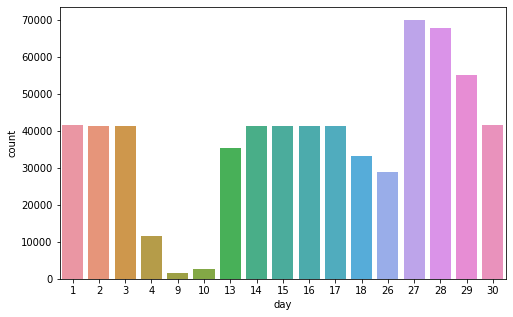

In [90]:
# Plot the count bar plot for day
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="day", data=df6)
plt.show()

From this graph, we immediately notice that there are some kind of trends across the day of a month. Although this is not fully representing all months as we only have data for November and December, but it is still worth discussing the differences. First, we notice that the number of rides are the least on 9th and 10th day while the rides are the most from 27th until 29th of the month. As for the rest of the days, they are similar which has moderate amount of rides. This could mean that people tend to spend money on taxi cabs when it is approaching the end of a month, causing the ride count to increase.

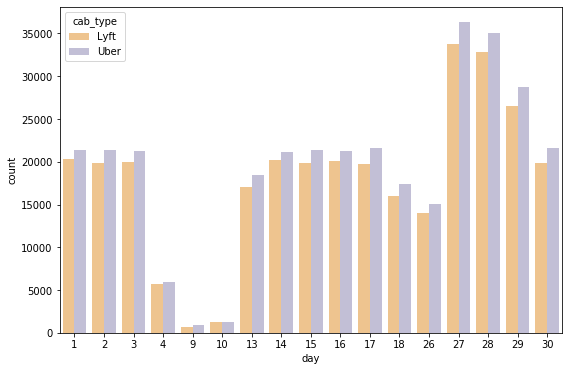

In [91]:
# Plot the count bar plot for day with cab type
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x="day", hue="cab_type", data=df6, palette="PuOr")
plt.show()

After applying cab types as color hue to the bar charts, the results remain largely similar to the one without cab types. There are 3 days in particular that have very similar counts for Uber and Lyft, that are 4th, 9th and 10th day of the month, with day 10 having almost the same count and this can be said as the only significant findings from the chart.

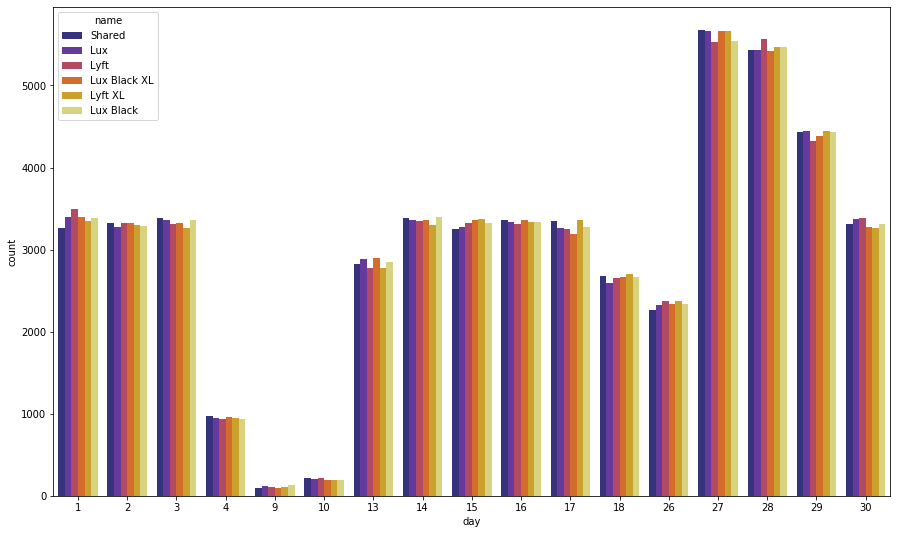

In [92]:
# Plot the Lyft count bar plot for month with name
fig, ax = plt.subplots(figsize=(15, 9))
sns.countplot(x="day", hue="name", data=df6[df6['cab_type'] == 'Lyft'], palette="CMRmap")
plt.show()

There are several things that can be discussed here, in which different days display different variations of cab products for Lyft rides. 

- **Shared**: It has the most rides on day 2, 3, 4, 10, 16 and 27 (6 days), while having the least rides on day 1, 9, 15 and 26.
- **Lux**: 29th day is the only day that has the most ride count for Lux, and day 2 and 18 display the least rides.
- **Lyft**: Day 1, 26, 28 and 30 (4 days) show the most Lyft ride count, while day 4, 16, 27 and 29 have the least Lyft ride count.
- **Lux Black XL**: This product only show the most ride on 13th day of the month, and day 17 and 28 show the least rides.
- **Lyft XL**: Day 15, 17 and 18 (3 days) display the most number of rides for Lyft XL, and day 3, 14 and 30 showing the least ride count for this product.
- **Lux Black**: Day 9 and 14 (2 days) are the two days that have the most rides for Lux Black, and day 10 is the only day that has the least rides for this product.

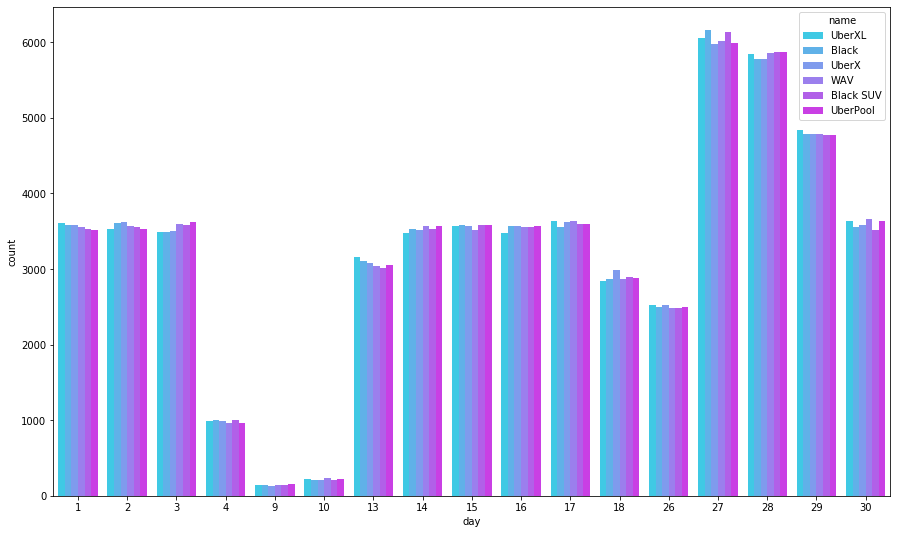

In [93]:
# Plot the Uber count bar plot for month with name
fig, ax = plt.subplots(figsize=(15, 9))
sns.countplot(x="day", hue="name", data=df6[df6['cab_type'] == 'Uber'], palette="cool")
plt.show()

Like Lyft, there are also a few things that can be discussed here, in which different days display different variations of cab products for Uber rides. 

- **UberXL**: It has the most rides on day 1, 13, 17, 26 and 29 (5 days), while having the least rides on day 2, 3, 14, 16 and 18.
- **Black**: 15th and 27th day (2 days) are the only days that has the most ride count for Lux, and day 17 and 28 display the least rides.
- **UberX**: Day 2 and 18 (2 days) show the most UberX ride count, while day 4 and 15 have the least UberX ride count.
- **WAV**: This product show the most ride on day 10, 14 and 30 (3 days) of the month, and day 17 and 28 show the least rides.
- **Black SUV**: Day 4 and 28 (2 days) display the most number of rides for Black SUV, and day 3, 14 and 30 showing the least ride count for this product.
- **UberPool**: Day 3, 9, 14 and 16 (4 days) are the two days that have the most rides for UberPool, and day 1, 4, 27 and 29 are the days that have the least rides for this product.

##### 3. Day of Week

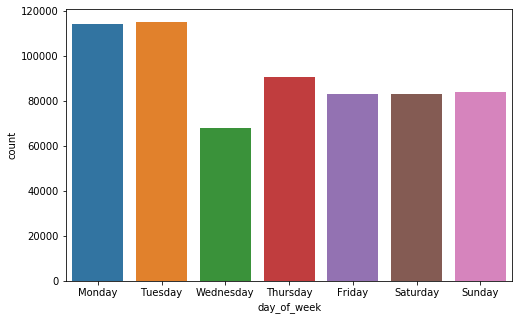

In [94]:
# Plot the count bar plot for day_of_week
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="day_of_week", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], data=df6)
plt.show()

We notice an obvious peak and low bars from the graph, with Tuesday having the most count, followed by Monday. As for the least count, Wednesday displays the least number of rides among other days. This could possibly due to the fact that people tend to have more stuff to rush during their work travel when the week is beginning on Monday and Tuesday, so customers tend to rely on cabs instead of driving.

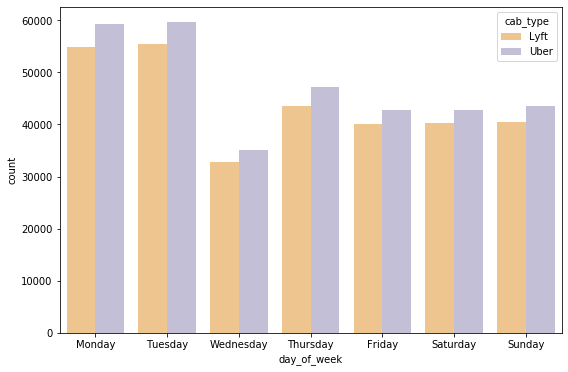

In [95]:
# Plot the count bar plot for day_of_week with cab type
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x="day_of_week", hue="cab_type", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              data=df6, palette="PuOr")
plt.show()

Like what we expect, Uber has more rides than Lyft on every day of the week due to the nature of the dataset, so there is nothing particularly meaningful here.

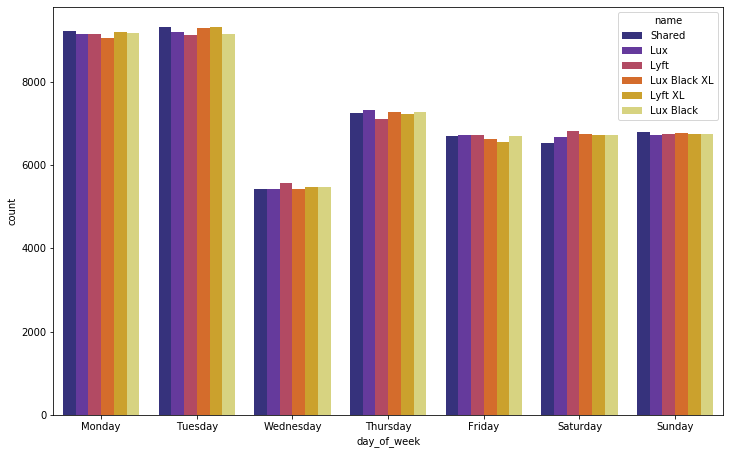

In [96]:
# Plot the Lyft count bar plot for day_of_week with name
fig, ax = plt.subplots(figsize=(12, 7.5))
sns.countplot(x="day_of_week", hue="name", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              data=df6[df6['cab_type'] == 'Lyft'], palette="CMRmap")
plt.show()

Similar to day of month, there are some interesting things that can be discussed here, in which different day of week displays different variations of cab products for Lyft rides. 

- **Shared**: It has the most rides on Monday, Tuesday and Sunday when compared to other products, while having the least rides on Saturday.
- **Lux**: Thursday and Friday are the days that have the most ride count for Lux in comparison with other products, and Sunday displays the least rides.
- **Lyft**: Wedneseday, Friday and Saturday show the most Lyft ride count, while Tuesday and Thursday have the least Lyft ride count.
- **Lux Black XL**: This product does not have any peak ride count on any day, and it shows the least rides on Monday.
- **Lyft XL**: This product also does not have any days with the most rides, and Friday showing the least ride count for this product.
- **Lux Black**: Like Lux Black XL and Lyft XL, it does not have most ride counts across the days of a week when we look at each day separately, and Tuesday is the only day that has the least rides for this product.

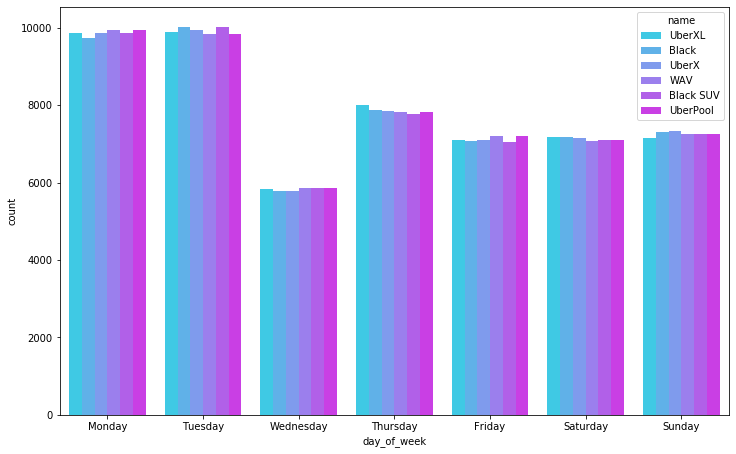

In [97]:
# Plot the Uber count bar plot for day_of_week with name
fig, ax = plt.subplots(figsize=(12, 7.5))
sns.countplot(x="day_of_week", hue="name", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              data=df6[df6['cab_type'] == 'Uber'], palette="cool")
plt.show()

Similar to Lyft, there are also a few things that can be discussed here, in which different days display different variations of cab products for Uber rides. 

- **UberXL**: It has the most rides than other products on Thursday, while having the least rides on Sunday.
- **Black**: Tuesday is the only day that has the most ride count for Black, and Monday and Wednesday display the least rides.
- **UberX**: Sunday shows the most UberX ride count compared to others, while Wednesday has the least UberX ride count.
- **WAV**: This product show the most ride on Monday, Wednesday and Friday, and Saturday shows the least rides.
- **Black SUV**: Tuesday and Wednesday display the most number of rides for Black SUV when compared to other products, and Thursday and Friday showing the least ride count for this product.
- **UberPool**: Monday, Wednesday and Friday are the three days that have the most rides for UberPool, and Tuesday has the least rides for this product.

##### 4. Hour

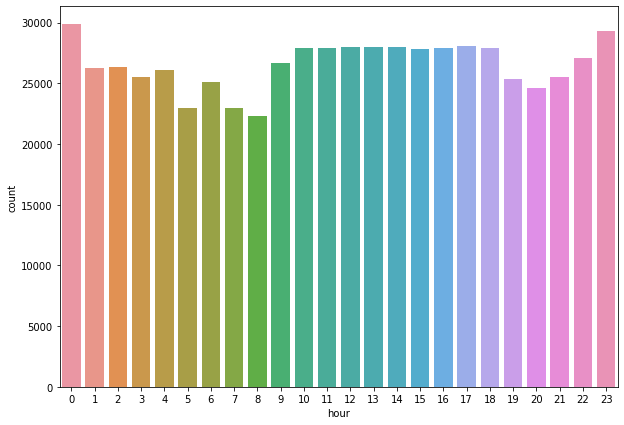

In [98]:
# Plot the count bar plot for hour
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="hour", data=df6)
plt.show()

It is pretty interesting to see the patterns and changes across the hours of a day. From this graph, we noted 2 areas that have more cab rides than usual, which are during midnight from 11pm to 1am midnight and another period from 10am to 6pm, with the midnight period having the most number of ride counts. We also see the least number of rides for the time from 7am to 9am early morning.

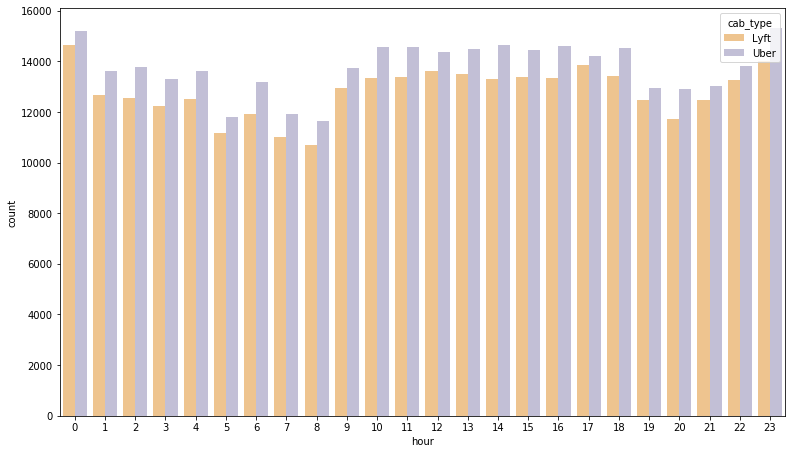

In [99]:
# Plot the count bar plot for hour with cab type
fig, ax = plt.subplots(figsize=(13, 7.5))
sns.countplot(x="hour", hue="cab_type", data=df6, palette="PuOr")
plt.show()

Once again, there is nothing special when we added cab types into the hour count distribution graph, as we already know that the nature of the dataset results in Uber observations being more than Lyft. Although the change in ride count seems to behave slightly different for Lyft and Uber, it is not that significant as it doesn't affect the peak periods that we discussed before. We can move on to the next bar graph.

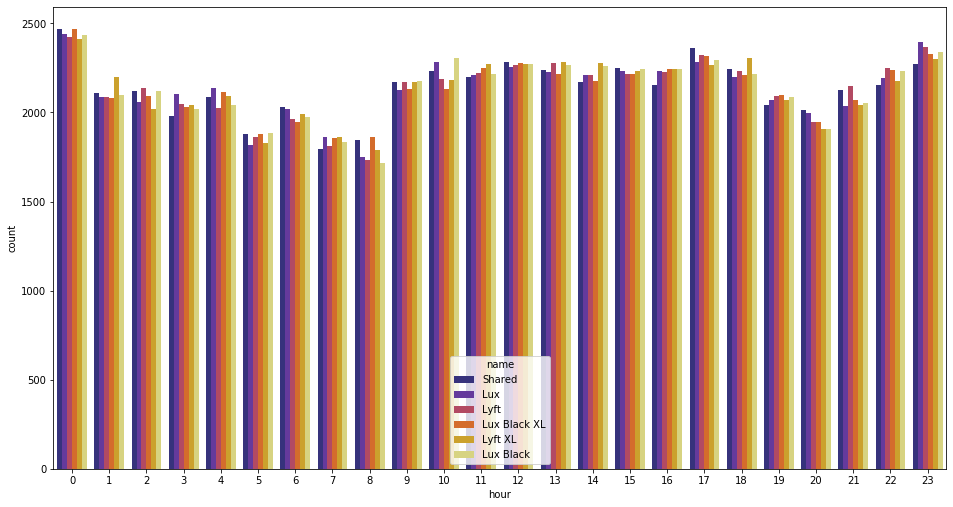

In [100]:
# Plot the Lyft count bar plot for hour with name
fig, ax = plt.subplots(figsize=(16, 8.5))
sns.countplot(x="hour", hue="name", data=df6[df6['cab_type'] == 'Lyft'], palette="CMRmap")
plt.show()

Similar to day of month and day of week, there are some interesting things that can be discussed here, in which different day of week displays different variations of cab products for Lyft rides. 

- **Shared**: It has the most rides at 12am, 6am, 9am, 12pm, 3pm, 5pm and 8pm, while having the least rides on 3am, 11am, 2pm, 4pm, 7pm, 10pm and 11pm.
- **Lux**: 3am, 4am, 7am and 11pm are the days that have the most ride count for Lux, and 5am, 9am, 12pm, 6pm and 9pm display the least rides.
- **Lyft**: 2am, 9am, 9pm and 11pm show the most Lyft ride count, while 4am and 3pm have the least Lyft ride count.
- **Lux Black XL**: This product has peak ride counts at 8am and 7pm, and it shows the least rides on 1am, 6am, 10am, 1pm and 3pm.
- **Lyft XL**: At 1am, 11am, 1pm, 2pm and 6pm the product has the most rides, and 12am, 2am, 5pm and 8pm showing the least ride count for this product.
- **Lux Black**: It has the most ride counts at 10am and 4pm, and 8am and 8pm are the two hours that has the least rides for this product.

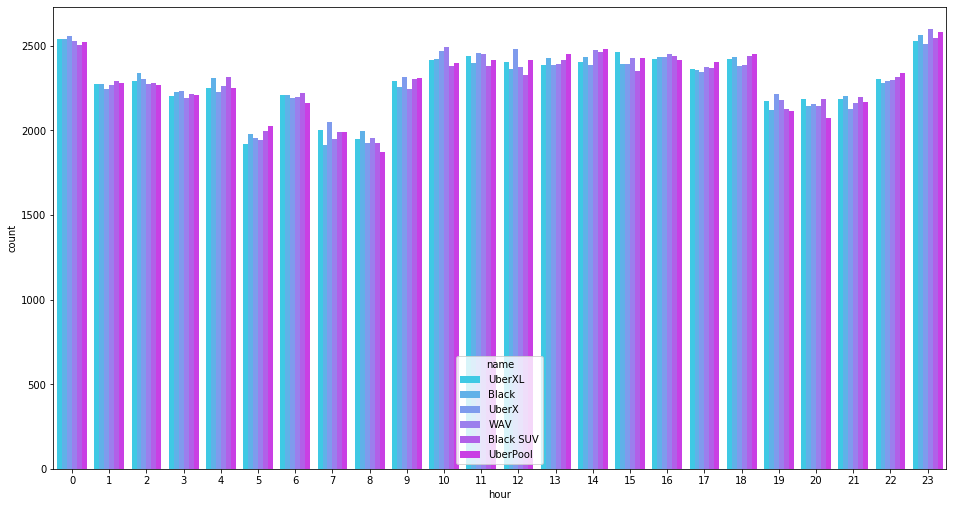

In [101]:
# Plot the Uber count bar plot for hour with name
fig, ax = plt.subplots(figsize=(16, 8.5))
sns.countplot(x="hour", hue="name", data=df6[df6['cab_type'] == 'Uber'], palette="cool")
plt.show()

Like Lyft, there are also a few things that can be discussed here, in which different days display different variations of cab products for Uber rides. 

- **UberXL**: It has the most rides at 3pm and 8pm compared to other products, while having the least rides at 5am.
- **Black**: 2am, 4am, 8am and 9pm are the hours that have the most ride count for Black, and 7am and 11pm display the least rides.
- **UberX**: 12am, 7am, 9am, 11am, 12pm and 7pm show the most UberX ride count, while 1am, 4am, 1pm, 2pm, 5pm, 6pm, 9pm and 11pm have the least UberX ride count.
- **WAV**: This product show the most ride at 10am, 4pm and 11pm, and 3am and 9am show the least rides.
- **Black SUV**: 1am, 4am and 6am display the most number of rides for Black SUV, and 12am, 10am, 11am, 12pm and 3pm showing the least ride count for this product.
- **UberPool**: 5am, 1pm, 2pm, 5pm, 6pm and 11pm are the days that have the most rides for UberPool, and 2am, 6am, 8am, 4pm, 7pm and 8pm have the least rides for this product.

#### Source and Destination

##### 1. Source

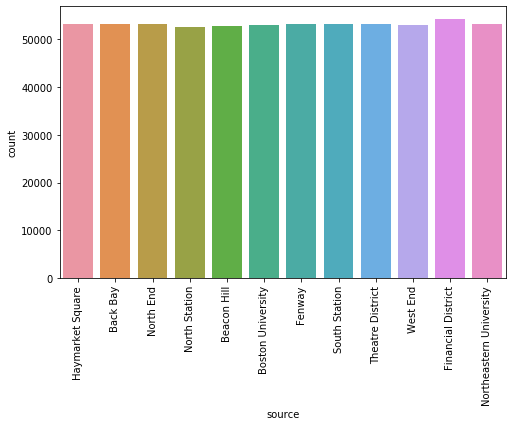

In [102]:
# Plot the count bar plot for source
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="source", data=df6)
plt.xticks(rotation = 90)
plt.show()

From the looks of it, the distribution of counts appear to be largely similar. The source of travel with the most ride count is Financial District while the source with the least ride count is North Station. Other than that, the others are almost having the same number of counts.

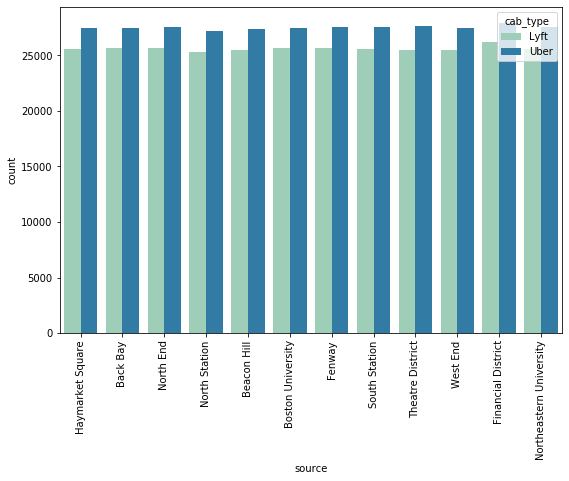

In [103]:
# Plot the count bar plot for source with cab type
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x="source", hue="cab_type", data=df6, palette="YlGnBu")
plt.xticks(rotation = 90)
plt.show()

Once again, applying cab types for comparison shows meaningless results due to the dataset's nature. As expected, Uber rides will always be more than Lyft rides across different travel points. Though, we can still note that Financial District remains the source area with the most ride count regardless of Uber or Lyft rides and same goes to North Station being the source of travel with the least count. We can move on to the other graphs that are more meaningful.

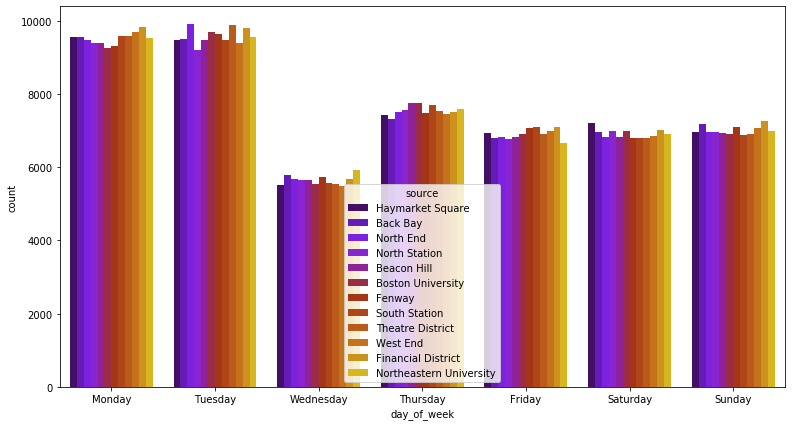

In [104]:
# Plot the count bar plot for day of week with source
fig, ax = plt.subplots(figsize=(13, 7))
sns.countplot(x="day_of_week", hue="source", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              data=df6, palette="gnuplot")
plt.show()

This comparison based on day of a week yields some interesting variations to be explored and analysed. It seems that different day may have different demand for cab rides from a certain travel point source from what we see here.

- **Monday**: It is observed that most customers tend to travel from Financial District on Monday, while we see the least number of rides travelling from Boston University.
- **Tuesday**: Most of the cab customers travel from North End on Tuesday, and we also observe the least customers that travel to North Station by cab on this day.
- **Wednesday**: Northeastern University has the most ride count as the travel source on Wednesday, while West End has the least rides as the travel source.
- **Thursday**: We observe that most customers travel from Beacon Hill and Boston University on Thursday, and we found out that Back Bay has the least number of cab rides.
- **Friday**: Most customers travel from South Station on Friday, and we see the least amount of rides travelling from Northeastern University on this day.
- **Saturday**: Haymarket Square is the source that display the most rides on Saturday, while Theatre District shows the least number of cab rides.
- **Sunday**: It is obvious that Financial District has the most number of rides as the source on Sunday, and South Station illustrate the least ride count for this day as the travel source.

##### 2. Destination

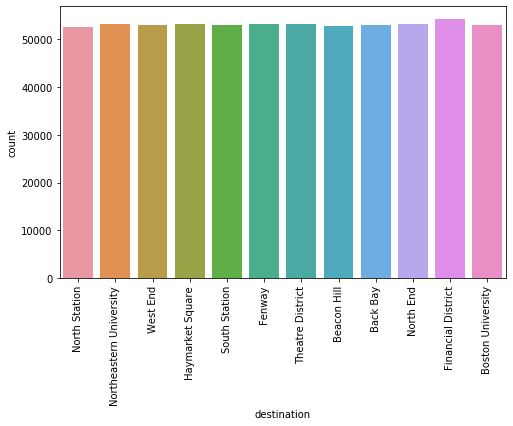

In [105]:
# Plot the count bar plot for destination
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="destination", data=df6)
plt.xticks(rotation = 90)
plt.show()

The results appear to be similar to source for this graph. To explain this, Financial District is the destination with the most number of rides and North Station has the least number of rides as destination, just like what we found out when analysing Source of travel. Also, the overall distribution across different destinations are pretty similar with very little variations.

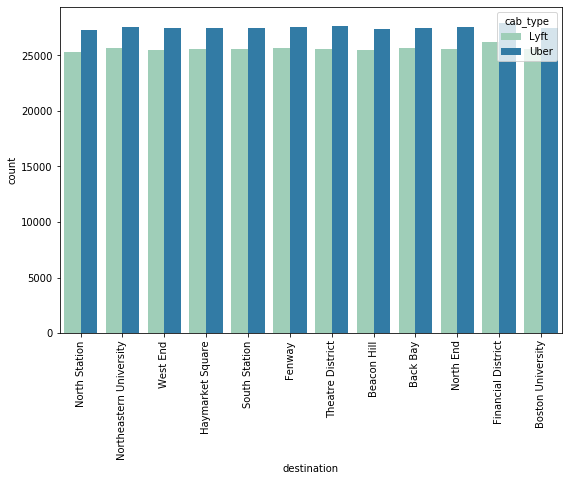

In [106]:
# Plot the count bar plot for destination with cab type
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x="destination", hue="cab_type", data=df6, palette="YlGnBu")
plt.xticks(rotation = 90)
plt.show()

While the difference between Lyft and Uber is expected to be not significant to discuss, there are still some minor findings that are notable. For Lyft cab, Financial District remains the destination with the most rides and North Station also remains as the place with the least rides. However, while Financial District still is the hottest destination of cab travel for Uber, we noticed that there is another destination with the least ride count apart from North Station, that is Beacon Hill.

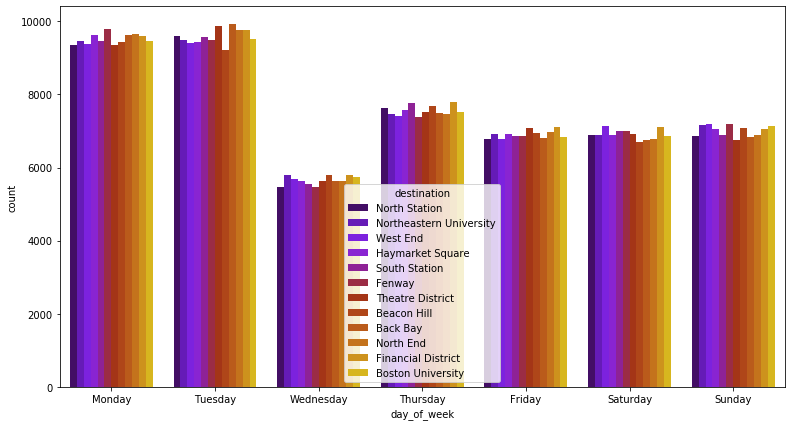

In [107]:
# Plot the count bar plot for day of week with destination
fig, ax = plt.subplots(figsize=(13, 7))
sns.countplot(x="day_of_week", hue="destination", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              data=df6, palette="gnuplot")
plt.show()

Like source variable, comparing based on day of a week produces interesting variations to be explored and analysed. It seems that different day may have different demand for cab rides from a certain destination point from what we observed.

- **Monday**: It is observed that most customers tend to travel to Fenway on Monday, while we see the least number of rides travelling to Theatre District.
- **Tuesday**: Most of the cab customers travel to Back Bay on Tuesday, and we also observe the least customers that travel to Beacon Hill by cab on this day.
- **Wednesday**: Northeastern University has the most ride count as the travel destination on Wednesday, while North Station has the least rides as the travel destination.
- **Thursday**: We observe that most customers travel to Financial District on Thursday, and we found out that Fenway has the least number of cab rides.
- **Friday**: Most customers travel to Financial District and Theatre District on Friday, and we see the least amount of rides travelling to North Station and West End on this day.
- **Saturday**: West End is the destination that display the most rides on Saturday, while Beacon Hill shows the least number of cab rides.
- **Sunday**: It is obvious that West End has the most number of rides as the destination on Sunday, and Theatre District illustrates the least ride count for this day as the travel destination.

#### Short Summary and Long Summary of Weather

##### 1. Short Summary

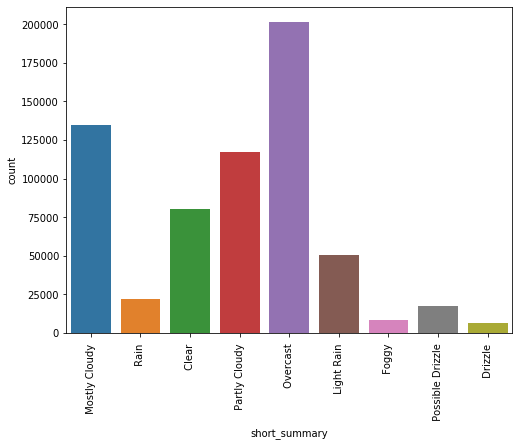

In [108]:
# Plot the count bar plot for short summary of weather
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="short_summary", data=df6)
plt.xticks(rotation = 90)
plt.show()

Based on the graph above, we noticed that the weather conditions that people tend to ride on a cab in Boston are mostly Overcast weather, which is when the sky is full of clouds, followed by Mostly Cloudy weather. As for the least occurring weathers, customers are less likely to take cabs when weather is Drizzle, in other words, light small rains. Then, it is followed by Foggy weather. It is logical as cloudy weathers are more comfortable and less troublesome for customers to call for cab services.

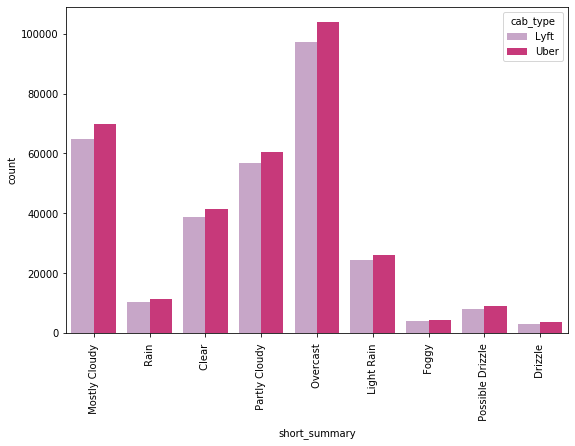

In [109]:
# Plot the count bar plot for short summary of weather with cab type
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x="short_summary", hue="cab_type", data=df6, palette="PuRd")
plt.xticks(rotation = 90)
plt.show()

Other than the fact that Uber has more ride counts than Lyft across all short summary of weathers due to the raw dataset's properties, we couldn't obtain any significant insights to explain this statistically. One thing to note is that some weathers like Rain, Foggy, Possible Drizzle and Drizzle have counts that are pretty close. However, it is not sufficient to explain anything because Uber and Lyft observations are not equal or similar, this is possibly just a coincidence.

##### 2. Long Summary

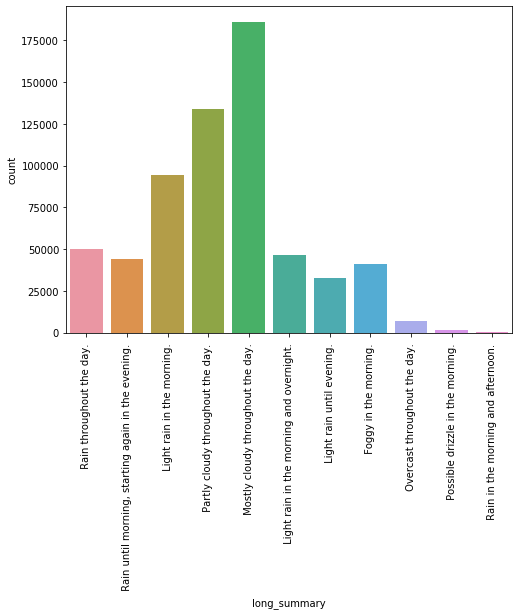

In [110]:
# Plot the count bar plot for short summary of weather
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="long_summary", data=df6)
plt.xticks(rotation = 90)
plt.show()

For long weather summary comparison, we observed that the most occurring weather when customers take cabs are "Mostly cloudy throughout the day" and followed by the second most occuring weather which is "Partly cloudy throughout the day". As for the other hand, the least occurring weather that we obtained here is "Rain in the morning and afternoon" followed by "Possible drizzle in the morning" when customers are travelling by cabs on the hour of their travel. This aligns well with our findings for short summary bar graphs that cloudy weather favours cab customers to travel while rain and drizzle do not favour cab rides compared to other weathers.

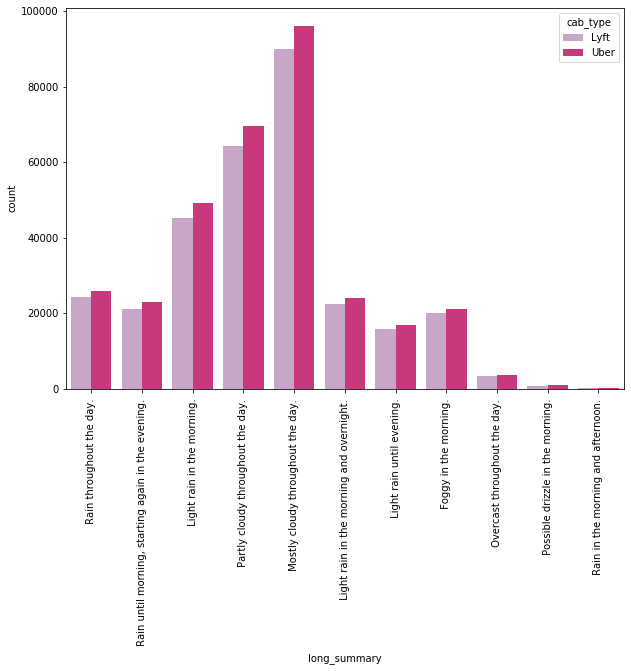

In [111]:
# Plot the count bar plot for short summary of weather with cab type
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="long_summary", hue="cab_type", data=df6, palette="PuRd")
plt.xticks(rotation = 90)
plt.show()

As usual for comparison of Uber and Lyft like this, Uber will always have more counts than Lyft. Unfortunately, we couldn't obtain deep insights about how customers of Uber and Lyft behave or opt for the products/services of the cabs according to different long summary of weathers becauses the percentage of Uber and Lyft rides are not equally distributed. Perhaps some kind of sampling algorithm can be used if EDA is the main focus of the project.

### Correlation Heat Map

For the last part of EDA, we want to see what features have positive or negative correlation with our variables of interest like price and price_per_mile, and the correlation coefficient is useful for this purpose. We'll use a heatmap that show colour intensity based on the values of correlation coefficient.

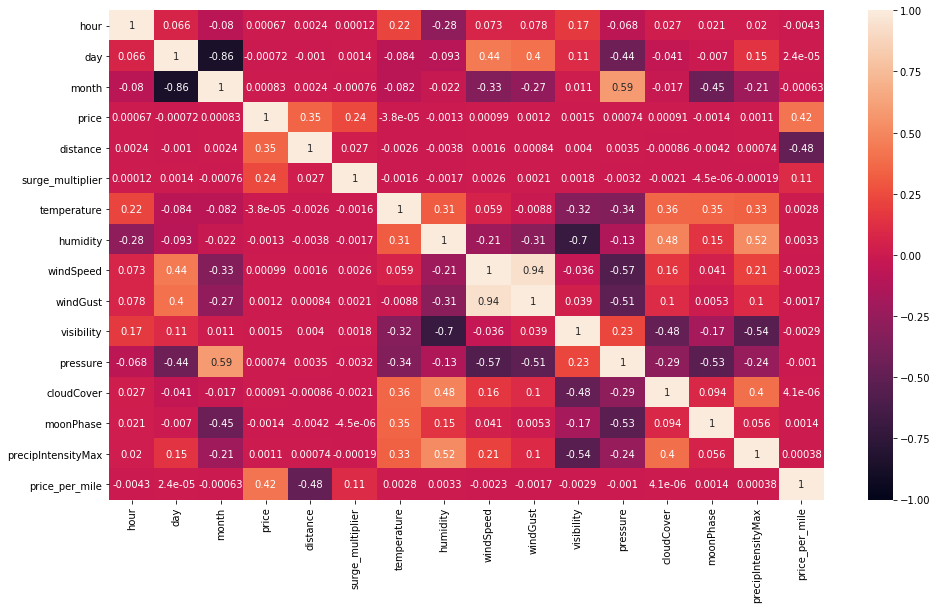

In [112]:
plt.figure(figsize=(16, 9))
sns.heatmap(df6.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

We will look at this heatmap and summarise our findings in 2 sections, which are weather and price.

##### Weather:

- Humidity has negative correlation with visibility
- Pressure has negative correlation with wind speed, wind gust, moon phase and day
- Wind speed has strong positive correlation with wind gust.
- Wind speed has positive correlation with day
- Wind gust has positive correlation with day
- Visibility has negative correlation with precipIntensityMax and cloud cover
- Cloud cover has positive correlation with precipIntensityMax and humidity
- Moon phase has negative correlation with month
- PrecipIntensityMax has positive correlation with humidity

##### Price:

- Price_per_mile has positive correlation with price and negative correlation with distance
- Price has positive correlation with distance and weak positive correlation with surge multiplier.

Unfortunately, there is no correlation being identified for the weather columns with the price or price_per_mile variables. The two variables that have some influence on price are distance and surge multiplier. This indicates that for the general case, prices of cab services are not affected by weather conditions, at least for the case of Boston in November and December. Lucky for us, we have some categorical variables that are possible to affect the prices, like source and destination.

### ANOVA Test

ANOVA test is a test that is carried out to determine correlation of categorical variables with continuous dependent variable using statistical significance like p-value and F statistics. We'll also calculate omega squared value to determine how big is the impact of the statistical significance of the indicated p-value. For our case, we'll be looking at destination, source and path which is our feature engineered variable.

#### Destination

In [ ]:
#anova = smf.ols(formula='price_per_mile ~ C(destination)', data=anova_df).fit()

In [123]:
anova_df = df6.copy()
anova_df = anova_df[['destination', 'price_per_mile']]

# Convert categorical variables to dummy
anova_df = pd.get_dummies(anova_df, columns=["destination"])
anova_df

price_per_mile  destination_Back Bay  destination_Beacon Hill  \
0            11.363636                     0                        0   
1            25.000000                     0                        0   
2            15.909091                     0                        0   
3            59.090909                     0                        0   
4            20.454545                     0                        0   
...                ...                   ...                      ...   
693065        9.500000                     0                        0   
693066       13.000000                     0                        0   
693067        9.500000                     0                        0   
693069       27.000000                     0                        0   
693070       10.000000                     0                        0   

        destination_Boston University  destination_Fenway  \
0                                   0                   0   
1                                   0                   0   
2                                   0                   0   
3                                   0                   0   
4                                   0                   0   
...                               ...                 ...   
693065                              0                   0   
693066                              0                   0   
693067                              0                   0   
693069                              0                   0   
693070                              0                   0   

        destination_Financial District  destination_Haymarket Square  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   
...                                ...                           ...   
693065                               0                             0   
693066                               0                             0   
693067                               0                             0   
693069                               0                             0   
693070                               0                             0   

        destination_North End  destination_North Station  \
0                           0                          1   
1                           0                          1   
2                           0                          1   
3                           0                          1   
4                           0                          1   
...                       ...                        ...   
693065                      1                          0   
693066                      1                          0   
693067                      1                          0   
693069                      1                          0   
693070                      1                          0   

        destination_Northeastern University  destination_South Station  \
0                                         0                          0   
1                                         0                          0   
2                                         0                          0   
3                                         0                          0   
4                                         0                          0   
...                                     ...                        ...   
693065                                    0                          0   
693066                                    0                          0   
693067                                    0                          0   
693069                                    0                          0  

In [132]:
anova_df.rename(columns={'destination_Back Bay':'Back_Bay', 'destination_Beacon Hill':'Beacon_Hill', 
                         'destination_Boston University':'Boston_University', 'destination_Fenway':'Fenway', 
                         'destination_Financial District':'Financial_District', 'destination_Haymarket Square':'Haymarket_Square', 
                         'destination_North End':'North_End', 'destination_North Station':'North_Station', 
                         'destination_Northeastern University':'Northeastern_University', 'destination_South Station':'South_Station', 
                         'destination_Theatre District':'Theatre_District', 'destination_West End':'West_End'}, inplace=True)
anova_df.columns

Index(['price_per_mile', 'Back_Bay', 'Beacon_Hill', 'Boston_University',
       'Fenway', 'Financial_District', 'Haymarket_Square', 'North_End',
       'North_Station', 'Northeastern_University', 'South_Station',
       'Theatre_District', 'West_End'],
      dtype='object')

In [133]:
from statsmodels.formula.api import ols
model = ols('price_per_mile ~ Back_Bay + Beacon_Hill + Boston_University + Fenway + Financial_District + Haymarket_Square + North_End + North_Station + Northeastern_University + South_Station + Theatre_District + West_End', 
            anova_df).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 12, 637502) =  4541.728, p =  0.0000


sum_sq        df          F    PR(>F)
Back_Bay                 8.641711e+02       1.0  15.961596  0.000065
Beacon_Hill              8.641711e+02       1.0  15.961596  0.000065
Boston_University        8.641711e+02       1.0  15.961596  0.000065
Fenway                   8.641711e+02       1.0  15.961596  0.000065
Financial_District       8.641711e+02       1.0  15.961596  0.000065
Haymarket_Square         8.641711e+02       1.0  15.961596  0.000065
North_End                8.641711e+02       1.0  15.961596  0.000065
North_Station            8.641711e+02       1.0  15.961596  0.000065
Northeastern_University  8.641711e+02       1.0  15.961596  0.000065
South_Station            8.641711e+02       1.0  15.961596  0.000065
Theatre_District         8.641711e+02       1.0  15.961596  0.000065
West_End                 8.641711e+02       1.0  15.961596  0.000065
Residual                 3.451477e+07  637502.0        NaN       NaN

In [138]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res)

sum_sq        df     mean_sq          F  \
Back_Bay                 8.641711e+02       1.0  864.171096  15.961596   
Beacon_Hill              8.641711e+02       1.0  864.171096  15.961596   
Boston_University        8.641711e+02       1.0  864.171096  15.961596   
Fenway                   8.641711e+02       1.0  864.171096  15.961596   
Financial_District       8.641711e+02       1.0  864.171096  15.961596   
Haymarket_Square         8.641711e+02       1.0  864.171096  15.961596   
North_End                8.641711e+02       1.0  864.171096  15.961596   
North_Station            8.641711e+02       1.0  864.171096  15.961596   
Northeastern_University  8.641711e+02       1.0  864.171096  15.961596   
South_Station            8.641711e+02       1.0  864.171096  15.961596   
Theatre_District         8.641711e+02       1.0  864.171096  15.961596   
West_End                 8.641711e+02       1.0  864.171096  15.961596   
Residual                 3.451477e+07  637502.0   54.140645        NaN   

                           PR(>F)    eta_sq  omega_sq  
Back_Bay                 0.000065  0.000025  0.000023  
Beacon_Hill              0.000065  0.000025  0.000023  
Boston_University        0.000065  0.000025  0.000023  
Fenway                   0.000065  0.000025  0.000023  
Financial_District       0.000065  0.000025  0.000023  
Haymarket_Square         0.000065  0.000025  0.000023  
North_End                0.000065  0.000025  0.000023  
North_Station            0.000065  0.000025  0.000023  
Northeastern_University  0.000065  0.000025  0.000023  
South_Station            0.000065  0.000025  0.000023  
Theatre_District         0.000065  0.000025  0.000023  
West_End                 0.000065  0.000025  0.000023  
Residual                      NaN       NaN       NaN

Strangely, when we separate the categorical groups into individual columns, they are statistically significant with p-value less than 0.05, all having values of 0.000065. It could mean that the difference is significant to price_per_mile variable. But when we calculate omega squared, the values are very small which indicate that the degree of statistical significance is very small.

In [142]:
anova_df2 = df6.copy()
anova_df2 = anova_df2[['destination', 'price_per_mile']]
model = ols('price_per_mile ~ destination', anova_df2).fit()
#print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
sm.stats.anova_lm(model, typ= 2)

sum_sq        df            F  PR(>F)
destination  2.951573e+06      11.0  4956.201513     0.0
Residual     3.451390e+07  637503.0          NaN     NaN

In [143]:
anova_table(sm.stats.anova_lm(model, typ= 2))

sum_sq        df        mean_sq            F  PR(>F)  \
destination  2.951573e+06      11.0  268324.783869  4956.201513     0.0   
Residual     3.451390e+07  637503.0      54.139200          NaN     NaN   

               eta_sq  omega_sq  
destination  0.078781  0.078765  
Residual          NaN       NaN

We obtain a p-value of exactly zero. This is not a good news, as it means given the current condition with the predictor, it is impossible to interpret under the null hypothesis. If we continue to calculate the omega squared value, we get a value of 0.079 which is very small. Overall, there is no way to interpret this using null or alternative hypothesis. However, when we separate the categories, we get significant p-values for all groups, so this can mean something important.

#### Source

In [170]:
anova_df3 = df6.copy()
anova_df3 = anova_df3[['source', 'price_per_mile']]

# Convert categorical variables to dummy
anova_df3 = pd.get_dummies(anova_df3, columns=["source"])

anova_df3.rename(columns={'source_Back Bay':'Back_Bay', 'source_Beacon Hill':'Beacon_Hill', 
                         'source_Boston University':'Boston_University', 'source_Fenway':'Fenway', 
                         'source_Financial District':'Financial_District', 'source_Haymarket Square':'Haymarket_Square', 
                         'source_North End':'North_End', 'source_North Station':'North_Station', 
                         'source_Northeastern University':'Northeastern_University', 'source_South Station':'South_Station', 
                         'source_Theatre District':'Theatre_District', 'source_West End':'West_End'}, inplace=True)

In [171]:
model = ols('price_per_mile ~ Back_Bay + Beacon_Hill + Boston_University + Fenway + Financial_District + Haymarket_Square + North_End + North_Station + Northeastern_University + South_Station + Theatre_District + West_End', 
            anova_df3).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res2 = sm.stats.anova_lm(model, typ= 2)
anova_table(res2)

Overall model F( 12, 637502) =  4679.497, p =  0.0000


sum_sq        df     mean_sq         F  \
Back_Bay                 1.500510e+02       1.0  150.050994  2.778125   
Beacon_Hill              1.500510e+02       1.0  150.050994  2.778125   
Boston_University        1.500510e+02       1.0  150.050994  2.778125   
Fenway                   1.500510e+02       1.0  150.050994  2.778125   
Financial_District       1.500510e+02       1.0  150.050994  2.778125   
Haymarket_Square         1.500510e+02       1.0  150.050994  2.778125   
North_End                1.500510e+02       1.0  150.050994  2.778125   
North_Station            1.500510e+02       1.0  150.050994  2.778125   
Northeastern_University  1.500510e+02       1.0  150.050994  2.778125   
South_Station            1.500510e+02       1.0  150.050994  2.778125   
Theatre_District         1.500510e+02       1.0  150.050994  2.778125   
West_End                 1.500510e+02       1.0  150.050994  2.778125   
Residual                 3.443251e+07  637502.0   54.011609       NaN   

                          PR(>F)    eta_sq  omega_sq  
Back_Bay                 0.09556  0.000004  0.000003  
Beacon_Hill              0.09556  0.000004  0.000003  
Boston_University        0.09556  0.000004  0.000003  
Fenway                   0.09556  0.000004  0.000003  
Financial_District       0.09556  0.000004  0.000003  
Haymarket_Square         0.09556  0.000004  0.000003  
North_End                0.09556  0.000004  0.000003  
North_Station            0.09556  0.000004  0.000003  
Northeastern_University  0.09556  0.000004  0.000003  
South_Station            0.09556  0.000004  0.000003  
Theatre_District         0.09556  0.000004  0.000003  
West_End                 0.09556  0.000004  0.000003  
Residual                     NaN       NaN       NaN

Looking at every single categories, their p-values are all at 0.09556, which is more than 0.05. This means that they are not statistically significant to price_per_mile. Besides, the omega squared values are even smaller than the one we have in destination groups, which further strengthens the fact that it is not statistically significant in our case. Thus, we failed to reject the null hypothesis.

In [145]:
anova_df3 = df6.copy()
anova_df3 = anova_df3[['source', 'price_per_mile']]
model = ols('price_per_mile ~ source', anova_df3).fit()
#print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
sm.stats.anova_lm(model, typ= 2)

sum_sq        df            F  PR(>F)
source    3.033108e+06      11.0  5105.174381     0.0
Residual  3.443237e+07  637503.0          NaN     NaN

In [146]:
anova_table(sm.stats.anova_lm(model, typ= 2))

sum_sq        df        mean_sq            F  PR(>F)  \
source    3.033108e+06      11.0  275737.112118  5105.174381     0.0   
Residual  3.443237e+07  637503.0      54.011301          NaN     NaN   

            eta_sq  omega_sq  
source    0.080957  0.080941  
Residual       NaN       NaN

For source, we still get a p-value of exactly zero, which is unfortunate, as it means given the current condition with the predictor, it is impossible to interpret under the null hypothesis. If we continue to calculate the omega squared value, we get a value of 0.081 which is very small, just like destination ANOVA test. Overall, there is no way to interpret this using null or alternative hypothesis.

#### Path

Let us try to feature engineer a new column just for the sake of ANOVA, if it is useful then we'll add this column into our main dataframe. We'll append source with destination and create a "path" variable.

In [156]:
df6["path"] = df6["source"] + "-" + df6["destination"]
df6["path"]

0         Haymarket Square-North Station
1         Haymarket Square-North Station
2         Haymarket Square-North Station
3         Haymarket Square-North Station
4         Haymarket Square-North Station
                       ...              
693065                West End-North End
693066                West End-North End
693067                West End-North End
693069                West End-North End
693070                West End-North End
Name: path, Length: 637515, dtype: object

In [169]:
df6.shape

(637515, 24)

In [157]:
anova_df4 = df6.copy()
anova_df4 = anova_df4[['path', 'price_per_mile']]
model = ols('price_per_mile ~ path', anova_df4).fit()
#print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
sm.stats.anova_lm(model, typ= 2)

sum_sq        df            F  PR(>F)
path      1.432687e+07      71.0  5559.005712     0.0
Residual  2.313861e+07  637443.0          NaN     NaN

In [158]:
anova_table(sm.stats.anova_lm(model, typ=2))

sum_sq        df        mean_sq            F  PR(>F)  \
path      1.432687e+07      71.0  201786.890768  5559.005712     0.0   
Residual  2.313861e+07  637443.0      36.299098          NaN     NaN   

            eta_sq  omega_sq  
path      0.382402  0.382333  
Residual       NaN       NaN

Although we still get zero for our p-value, but the omega squared value spikes compared to previous ANOVA test to a value of 0.38 which is pretty high! This means that the variable has a large impact of significance. It is quite possible that this value can be important to predict the price rate of the cab services. Thus, we'll include "path" into our main variable for modeling later.

## Summary of Data Cleaning and EDA

Now this sums up our Data Cleaning and Exploratory Data Analysis for this dataset. To conclude our progress, we'll do a summary of the 2 main steps of the data science process here.

### Data Cleaning Summary:

- **Checked for duplicates**: There is none so it is good news to us.
- **Dealing with missing values**: We dropped the missing values as we have no way to impute them.
- **Removing irrelevant columns**: Our columns are reduced from 57 to 21 columns before feature engineering.
- **Feature Engineering**: We create 3 columns which are price_per_mile, day_of_week and path, total up to 24 columns.
- **Removing outliers**: The outliers that have z score larger than 5 are removed by computing z scores based on price_per_mile.

### Exploratory Data Analysis Summary:

- **Correlation Heatmap**: There are no numerical variables that have correlation with price or price_per_mile variable.
- **ANOVA Test**: When separate into individual categories, destination is statistically significant to price_per_mile but source is not statistically significant which fails to reject null hypothesis. For path, we get p-value of zero but a high omega squared value, which may indicate significance towards price_per_mile. We also want to note that we did not perform ANOVA test for product names which is also another feature that may have strong influence towards price per mile.